In [1]:
import numpy as np 
import FlowCytometryTools
from FlowCytometryTools import FCMeasurement
from FlowCytometryTools import FCPlate
from FlowCytometryTools import ThresholdGate, PolyGate
import matplotlib.pyplot as plt
import scipy as sp
import scipy.special
import seaborn as sns
import pandas as pd
import datetime as dt

FSCHgateupper = ThresholdGate(6050.0, ['FSC-H'], region='below')
FSCHgatelower = ThresholdGate(5000.0, ['FSC-H'], region='above')
SSCHgatelower = ThresholdGate(4600.0, ['SSC-H'], region='above') 
SSCHgateupper = ThresholdGate(5800.0, ['SSC-H'], region='below')
scatter_gates = FSCHgateupper & FSCHgatelower & SSCHgatelower & SSCHgateupper


bfp_threshold = [[{"A5":8700, "B5":8600, "A7":8650, "B7":8575}], 
                 [{"A1":8650, "B1":8600, "C1":8700, "D1":8750, "F1":8600, "G1":8600, "H1":8775,
                   "A3":8600, "B3":8600, "C3":8600, "D3":8600, "E3":8600, "F3":8600, "G3":8600, "H3":8600,
                   "A5":8600, "B5":8750, "C5":8600, "D5":8600, "E5":8600, "F5":8600, "G5":8600, "H5":8600,
                   "A7":8700, "B7":8700, "C7":8700, "D7":8700, "E7":8700, "F7":8800, "G7":8650, "H7":8700},
                  {"A1":8750, "B1":8750, "C1":8750, "D1":8750, "F1":8750, "G1":8750, "H1":8750,
                   "A3":8750, "B3":8750, "C3":8750, "D3":8750, "F3":8750, "G3":8750, "H3":8750,
                   "A5":8750, "B5":8750, "C5":8750, "D5":8750, "F5":8750, "G5":8750, "H5":8750,
                   "A7":8750, "B7":8750, "C7":8750, "D7":8750, "F7":8750, "G7":8750, "H7":8750,
                   "A9":8750, "B9":8750, "C9":8750, "D9":8750, "F9":8750, "G9":8750, "H9":8600,
                   "A11":8750, "B11":8750, "C11":8750, "D11":8750, "F11":8750, "G11":8750, "H11":8750}, 
                  {"A1":8600, "B1":8600, "C1":8600, "D1":8700, "E1":8600, "F1": 8600, "G1":8600, "H1":8600,
                   "A3":8600, "B3":8600, "C3":8700, "D3":8700, "E3":8600, "F3":8600, "G3":8600, "H3":8600,
                   "A5":8600, "B5":8650, "C5":8600, "D5":8600, "E5":8600, "F5":8600, "G5":8600, "H5":8600,
                   "A7":8600, "B7":8600, "C7":8600, "D7":8600, "E7":8600, "F7":8600, "G7":8600, "H7":8600,
                   "A9":8600, "B9":8600, "C9":8600, "D9":8625, "E9":8600, "F9":8600, "G9":8600, "H9":8600,
                   "A11":8600, "B11":8600, "C11":8650, "D11":8600, "E11":8600, "F11":8600, "G11":8600, "H11":8600}]]
yfp_threshold = 6500

days = list(range(0,2))
plate_num = list(range(1,4))
plates = {}
    
for day in days:
    list_plates = []
    if day == 1:
        for p in plate_num:
            datadir = '/Volumes/WD Elements/7.28.22_monoculture_flucts/D1/p{}/'.format(str(p))
            plate = FCPlate.from_dir(ID='96-well', path=datadir, parser='name')
            plate_transformed = plate.transform('hlog', channels=['BFP-H','YFP-H'], b=100.0).transform('hlog', channels=['FSC-H','SSC-H'], b=10.0**2).gate(scatter_gates)
            list_plates.append(plate_transformed)
    else:
        datadir = '/Volumes/WD Elements/7.28.22_monoculture_flucts/D0/p1/'
        plate = FCPlate.from_dir(ID='96-well', path=datadir, parser='name')
        plate_transformed = plate.transform('hlog', channels=['BFP-H','YFP-H'], b=100.0).transform('hlog', channels=['FSC-H','SSC-H'], b=10.0**2).gate(scatter_gates)
        list_plates.append(plate_transformed) 
    plates[day] = list_plates

    

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/FlowCytometryTools/core/transforms.py:180: RuntimeWarning: divide by zero encountered in log10
  lxmin = max([log10(abs(xmin)), 0])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/FlowCytometryTools/core/transforms.py:180: RuntimeWarning: divide by zero encountered in log10
  lxmin = max([log10(abs(xmin)), 0])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/FlowCytometryTools/core/transforms.py:180: RuntimeWarning: divide by zero encountered in log10
  lxmin = max([log10(abs(xmin)), 0])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/FlowCytometryTools/core/transforms.py:180: RuntimeWarning: divide by zero encountered in log10
  lxmin = max([log10(abs(xmin)), 0])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/FlowCytometryTools/core/transforms.py:180: RuntimeWarning: divide by zero encounte

In [2]:
def f1_expectation(theta,f1obs_data,f2obs_data,nmax=100):
    f1,lam = theta
    f2=1-f1
    f1obs=0
    f2obs=0
    for k in range(1,nmax):
        f1obs+=((f1*lam)**k)/scipy.special.factorial(k)/(np.exp(lam)-1)
        f2obs+=((f2*lam)**k)/scipy.special.factorial(k)/(np.exp(lam)-1)
    return f1obs-f1obs_data, f2obs-f2obs_data


def get_bfp_freq(data, day, plate_num, well):
    bfp_pos = data['BFP-H']>bfp_threshold[day][plate_num][well]
    yfp_pos = data['YFP-H']>yfp_threshold
    bfp_neg = data['BFP-H']<bfp_threshold[day][plate_num][well]
    yfp_neg = data['YFP-H']<yfp_threshold

    bfp = len(data[bfp_pos & yfp_neg])
    yfp = len(data[yfp_pos & bfp_neg])
    dp = len(data[bfp_pos & yfp_pos])
    Q = bfp + yfp + dp
    func = lambda theta: f1_expectation(theta,bfp/Q,yfp/Q)
    res = sp.optimize.root(func, [bfp/Q, 0.5])

    bfp_mean = np.float(data[bfp_pos & yfp_neg]['BFP-H'].mean())
    yfp_mean = np.float(data[yfp_pos & bfp_neg]['YFP-H'].mean())
    return res.x, Q, bfp_mean, yfp_mean

In [3]:
def plot_plates(plates, day, plate_num, well, bfp_threshold, yfp_threshold):
    b_gate = ThresholdGate(bfp_threshold[day][plate_num][well], ['BFP-H'], region='above')
    y_gate = ThresholdGate(yfp_threshold, ['YFP-H'], region='above')
    all_plates = list(plates.values())
    for plate in all_plates:
        all_plates[day][plate_num][well].plot(['BFP-H', 'YFP-H'], gates=[b_gate, y_gate]) 

In [7]:
def get_bfp_freq_help(data, day, plate_num, well, bfp_thresh, yfp_thresh):
    bfp_pos = data['BFP-H']>bfp_thresh
    yfp_pos = data['YFP-H']>yfp_thresh
    bfp_neg = data['BFP-H']<bfp_thresh
    yfp_neg = data['YFP-H']<yfp_thresh

    bfp = len(data[bfp_pos & yfp_neg])
    yfp = len(data[yfp_pos & bfp_neg])
    dp = len(data[bfp_pos & yfp_pos])
    Q = bfp + yfp + dp
    func = lambda theta: f1_expectation(theta,bfp/Q,yfp/Q)
    res = sp.optimize.root(func, [bfp/Q, 0.5])
    return res.x

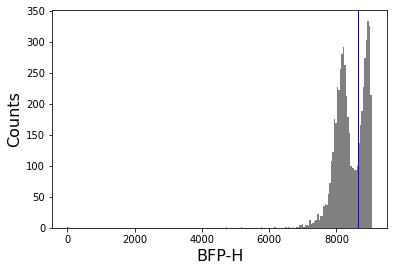

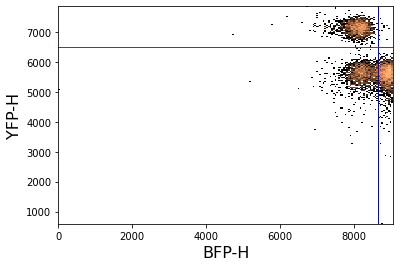

0.553488718918622


In [193]:
b_gate_upper = ThresholdGate(8650, ['BFP-H'], region='below')
y_gate = ThresholdGate(6500, ['YFP-H'], region='above')
all_plates = list(plates.values())
plt.figure()
all_plates[0][0]['A7'].plot(['BFP-H'], gates=[b_gate_upper]) 
plt.show()

plt.figure()
all_plates[0][0]['A7'].plot(['BFP-H', 'YFP-H'], gates=[b_gate_upper, y_gate]) 
plt.show()

res = get_bfp_freq_help(plates[0][0]['A7'].data, 0, 0, 'A7', 8650, 6500)
print(res[0])

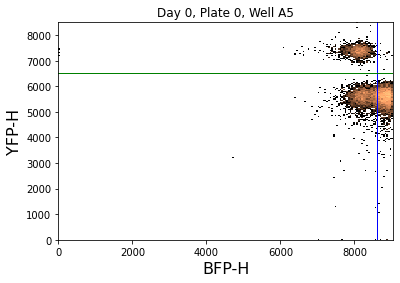

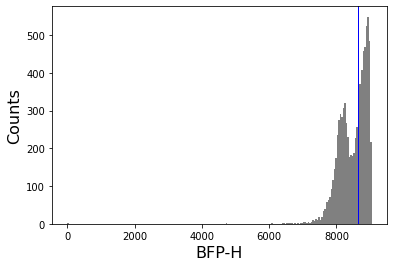

0.7216235557321838


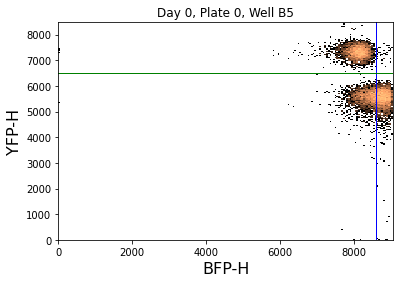

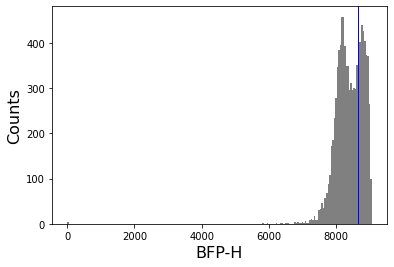

0.5083769565807257


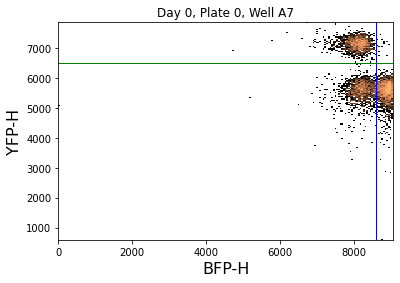

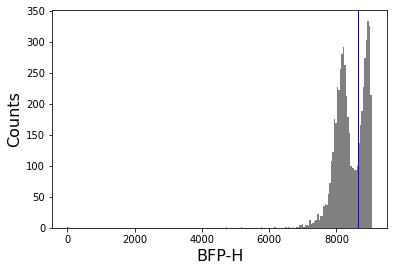

0.5666422074564256


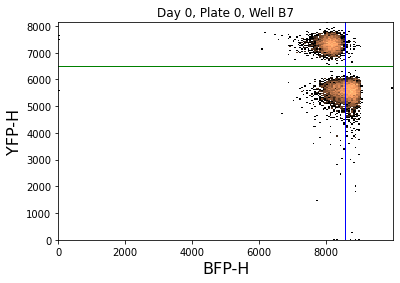

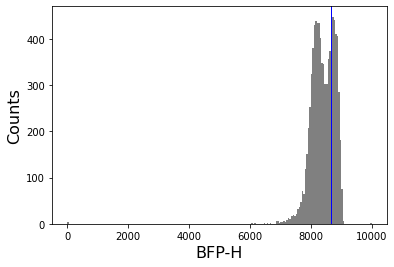

0.5012469218728108


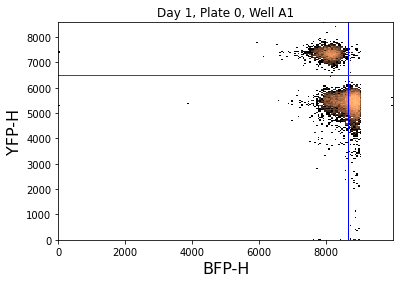

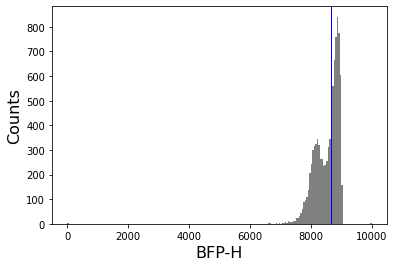

0.6844972800995622


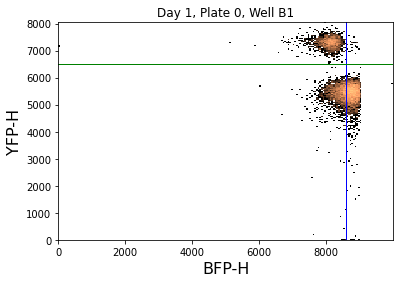

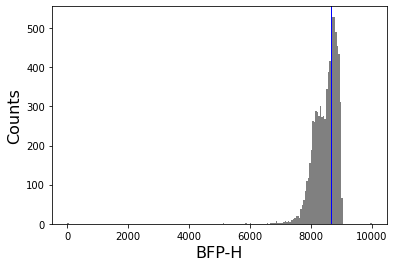

0.6594056384331273


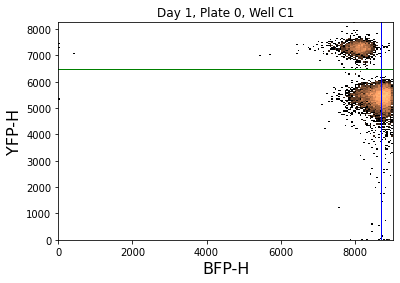

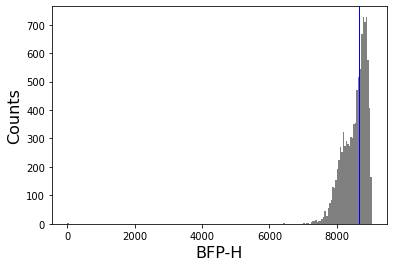

0.6680351808377257


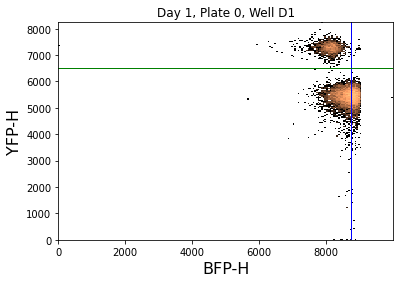

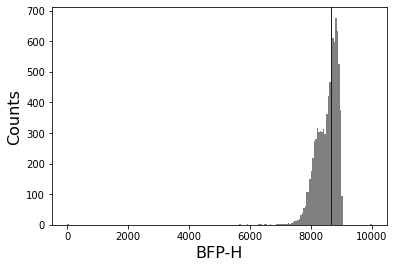

0.63464958826544


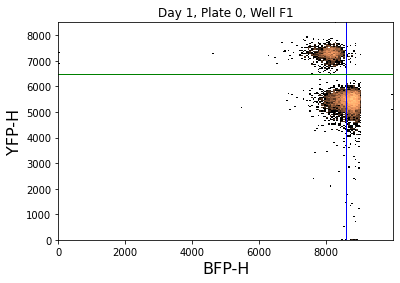

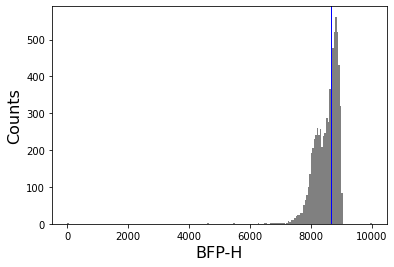

0.6928147288273757


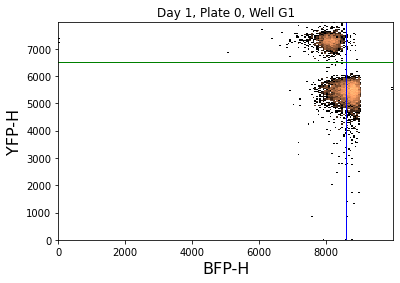

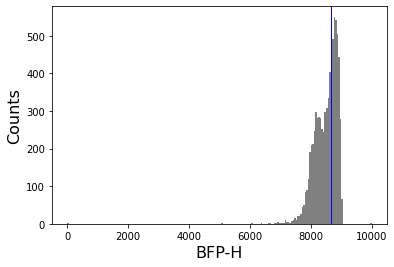

0.6576753457765621


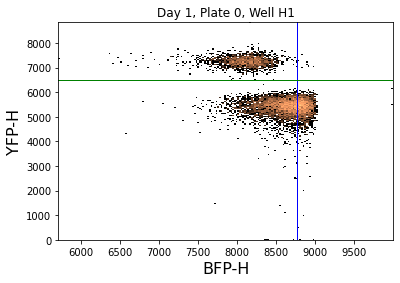

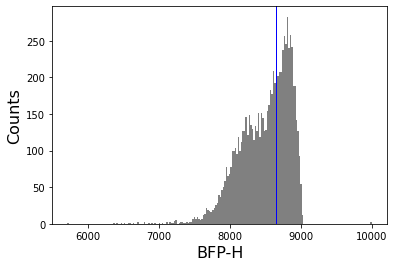

0.5297440774572957


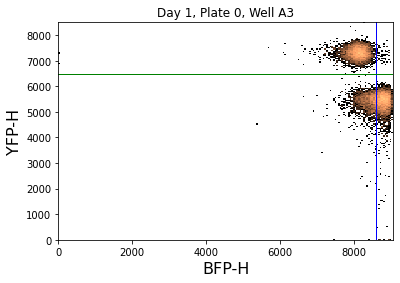

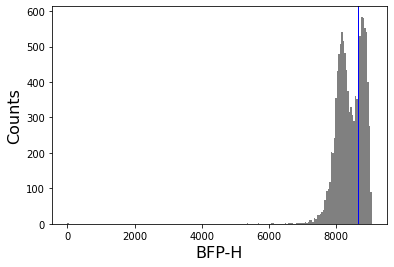

0.4770031241822868


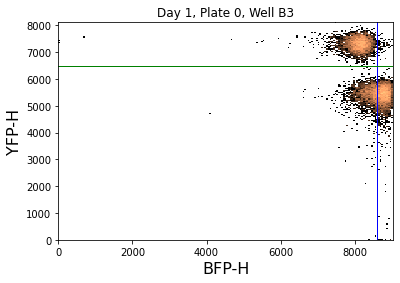

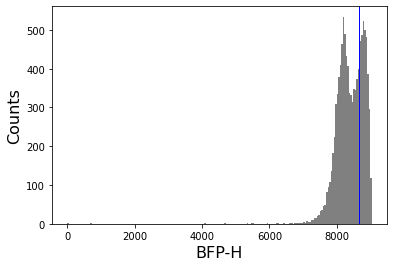

0.47367017051136273


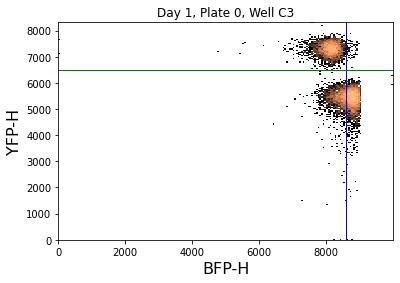

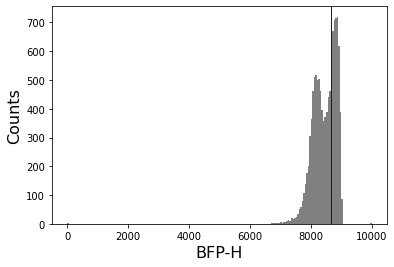

0.5379185761752294


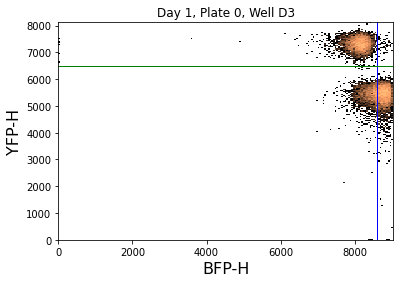

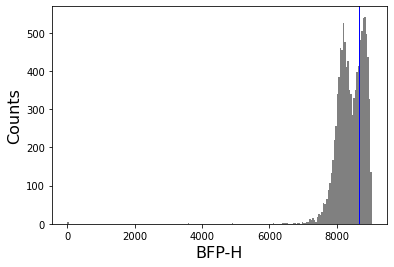

0.48407264360367874


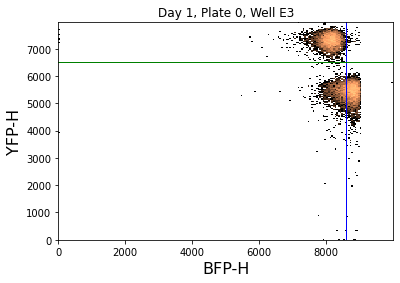

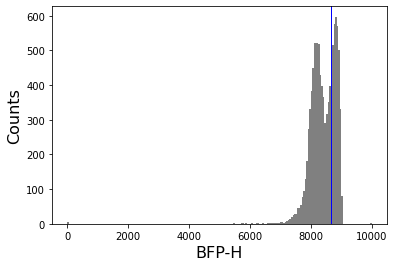

0.4682565715510949


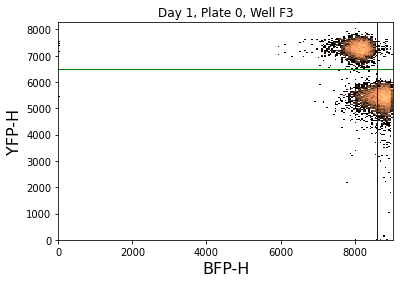

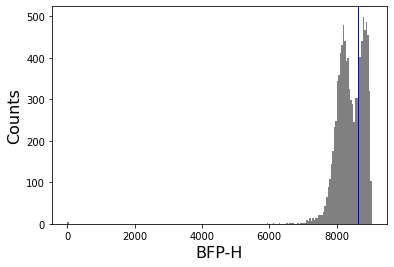

0.4666074712462401


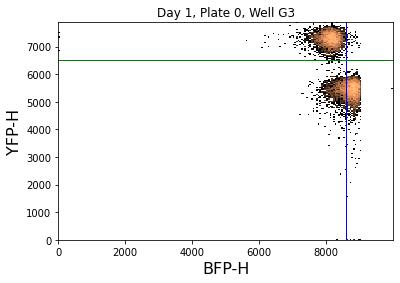

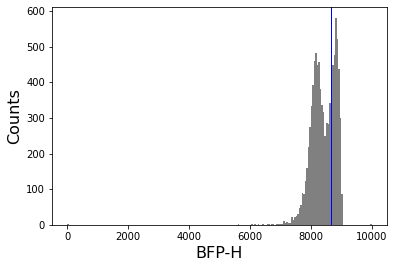

0.4671112882694609


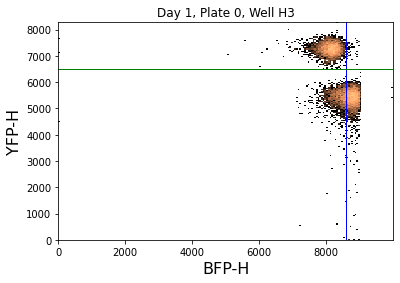

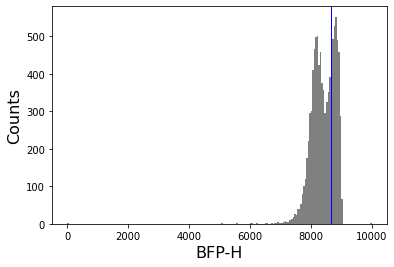

0.4789747463028186


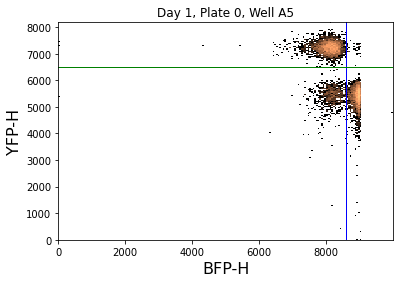

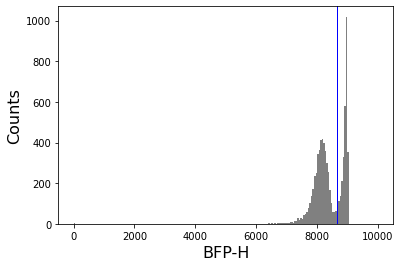

0.4441241634181827


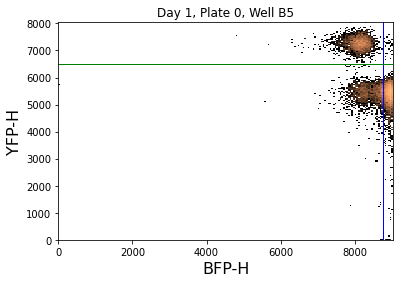

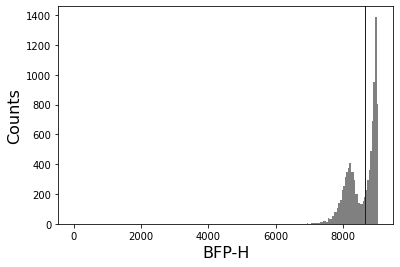

0.611325948800639


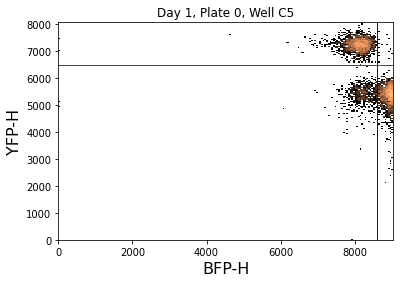

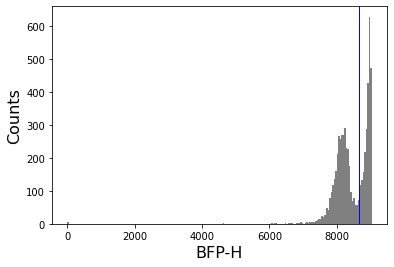

0.48653284506789457


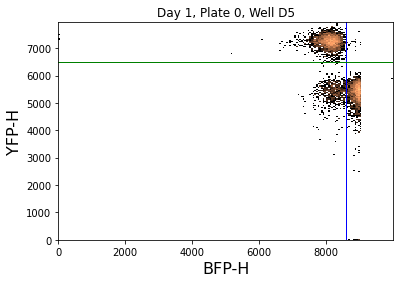

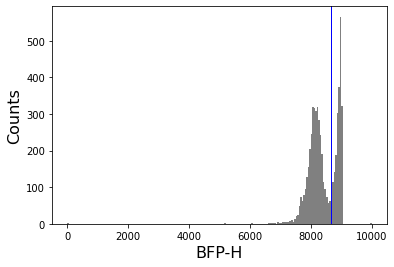

0.43115228550966306


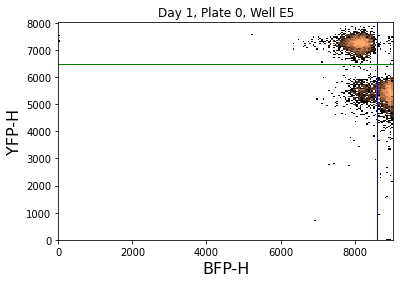

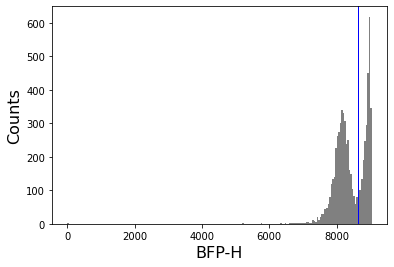

0.4462698795661616


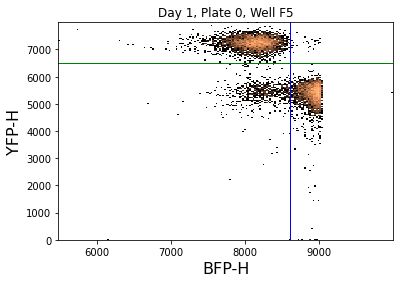

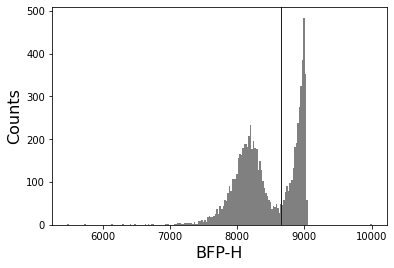

0.4550382986320177


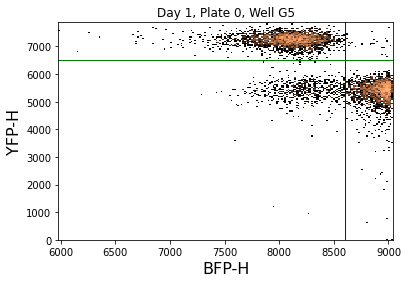

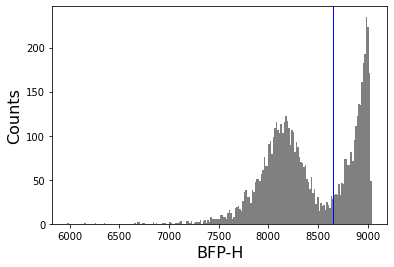

0.4482898722907159


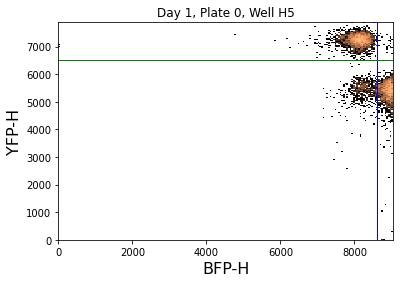

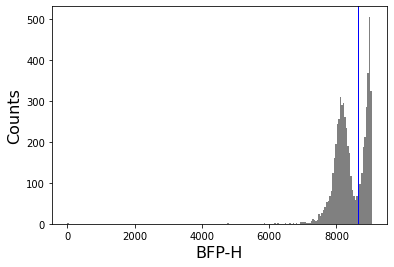

0.4364380688382716


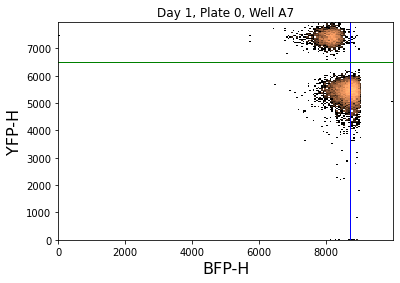

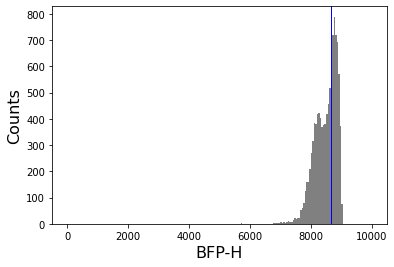

0.5660611378110276


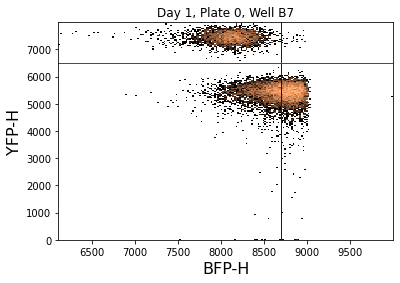

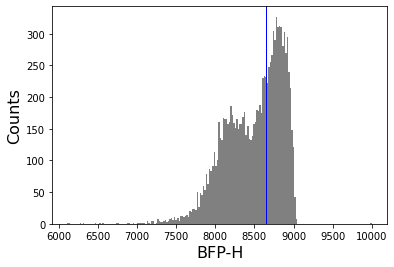

0.5583830039216044


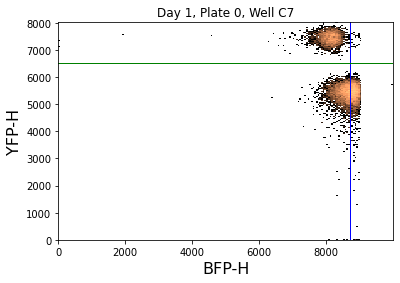

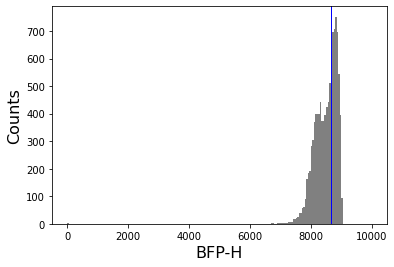

0.5674314172143347


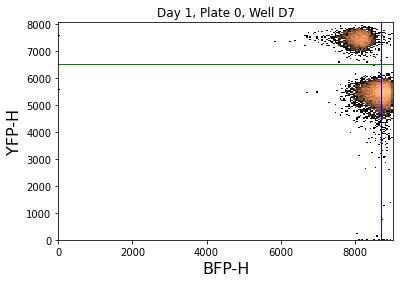

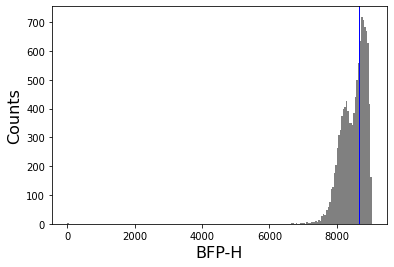

0.5646650121305621


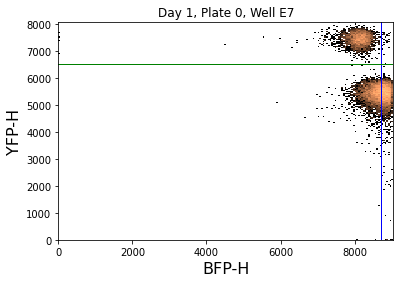

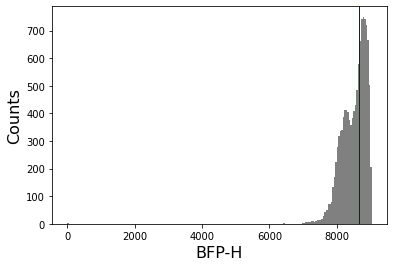

0.5906159961329868


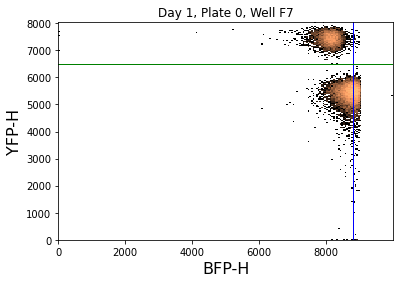

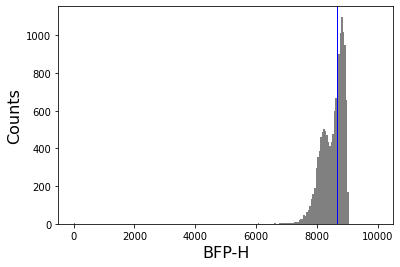

0.49660078510036865


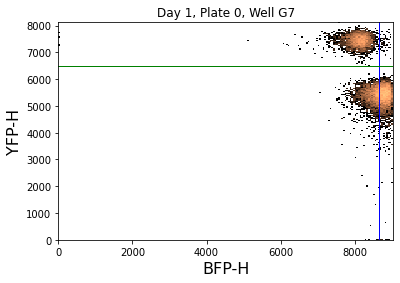

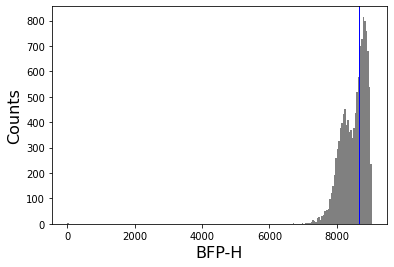

0.5965826948162186


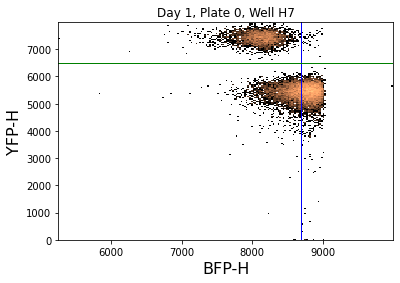

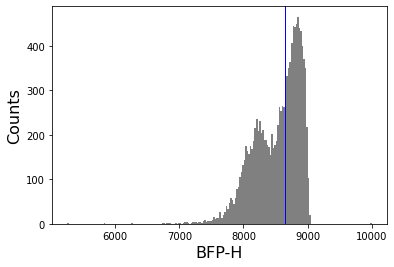

0.6045281281044669


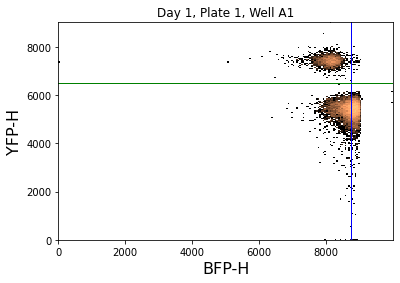

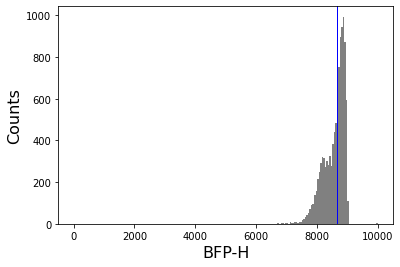

0.6782767457740284


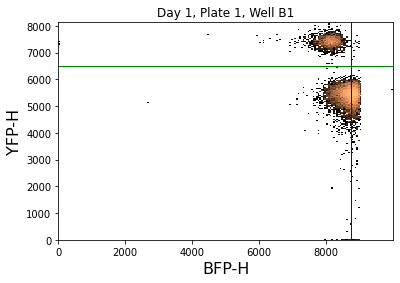

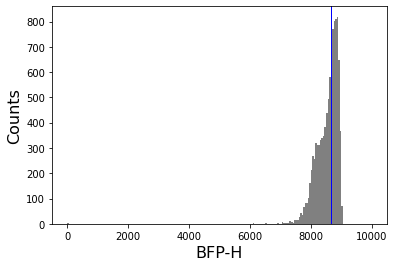

0.6376556133560581


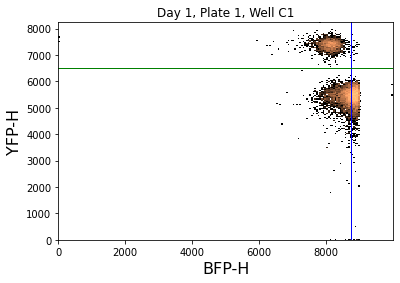

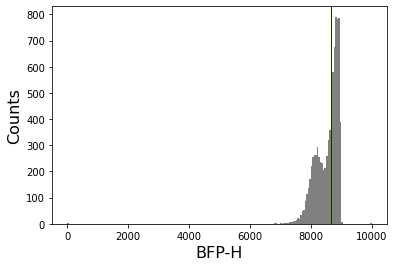

0.6322562525177742


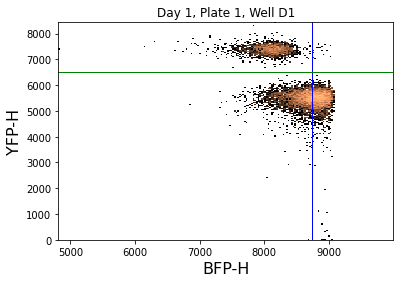

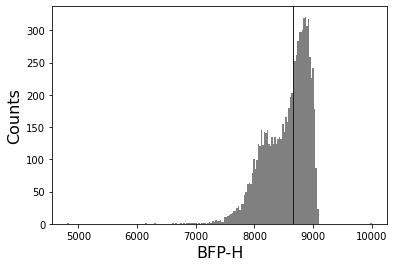

0.6266091775503604


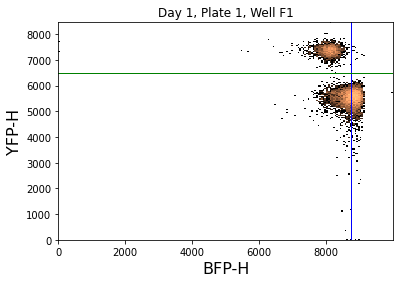

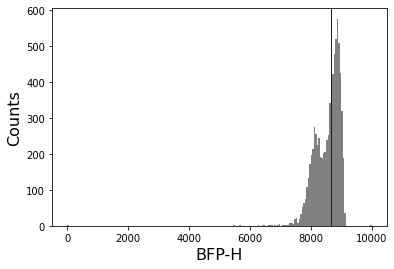

0.6150436848262348


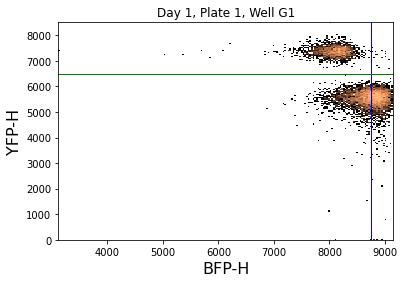

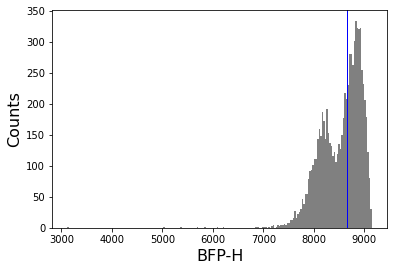

0.5852855046369666


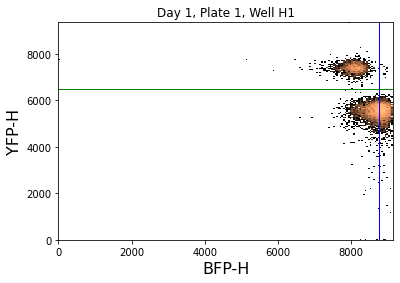

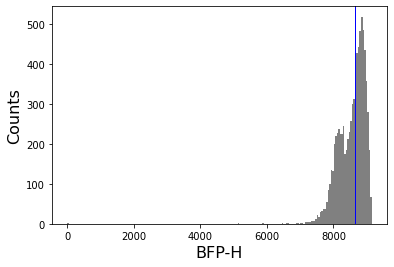

0.6115714305314266


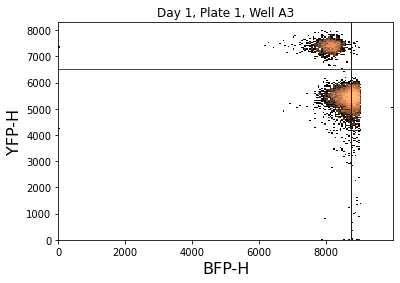

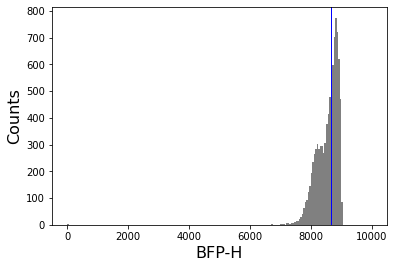

0.632699676279484


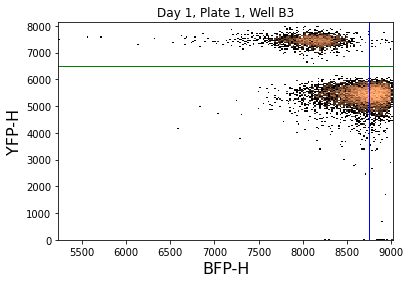

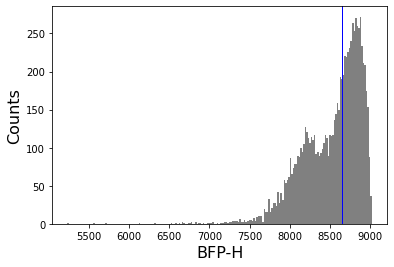

0.5916407514800993


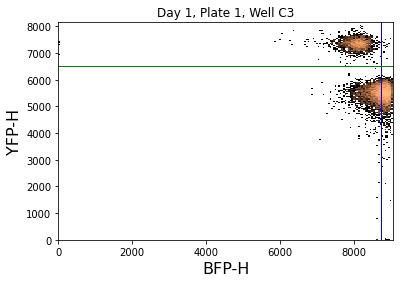

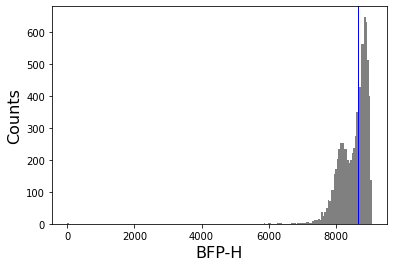

0.608181613853709


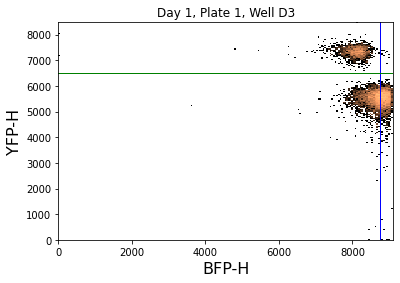

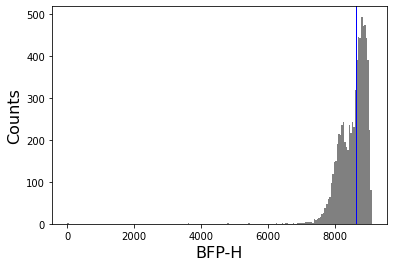

0.6268519593572085


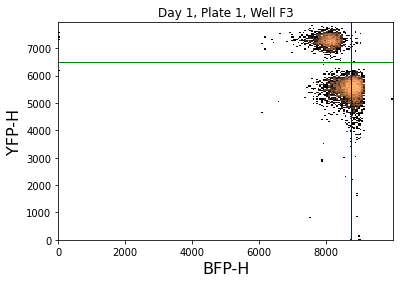

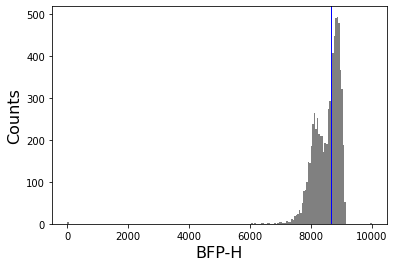

0.5834032977199193


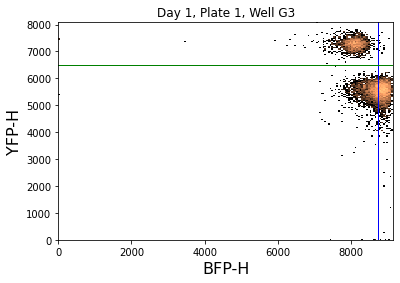

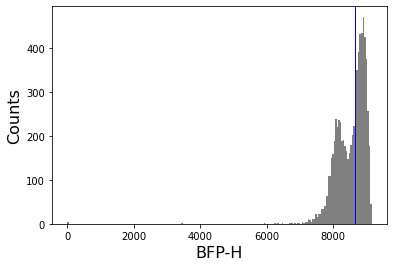

0.5824807442719068


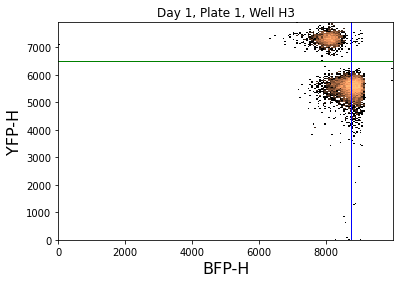

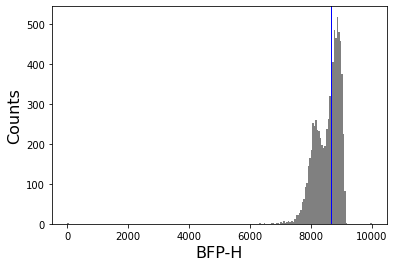

0.6087439158180815


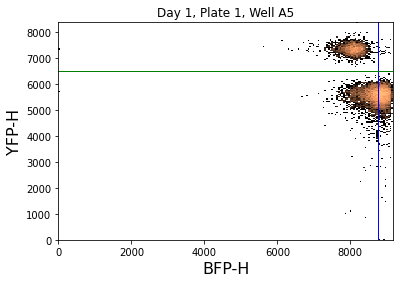

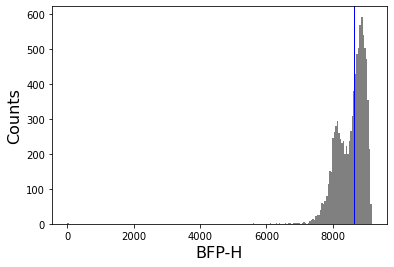

0.6295823655903697


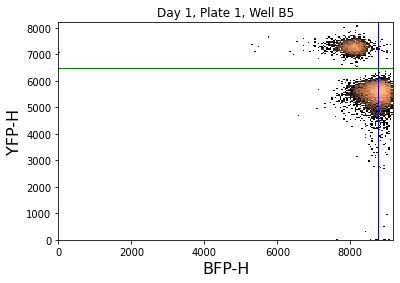

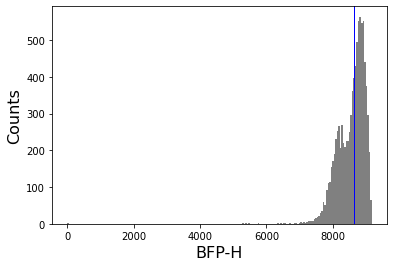

0.6349777693536075


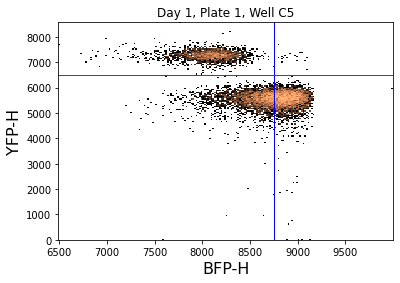

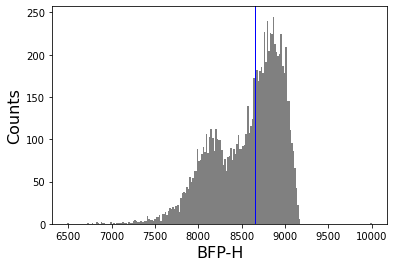

0.6357381808515107


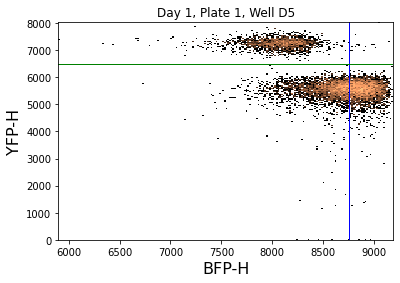

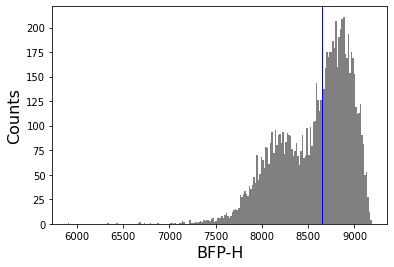

0.6434053793338425


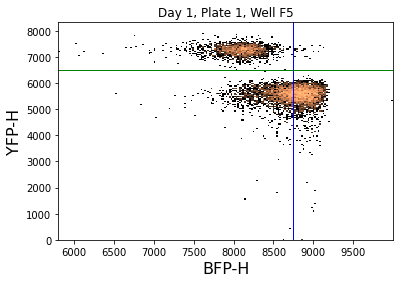

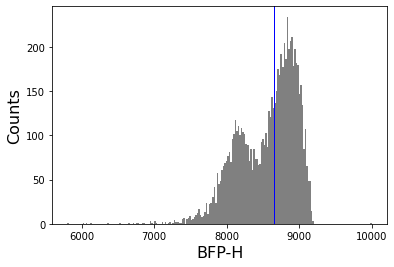

0.6112566237249389


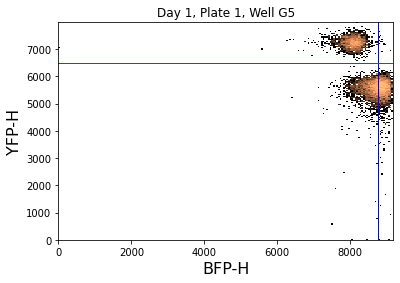

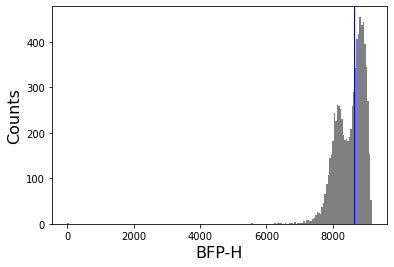

0.5794879884384648


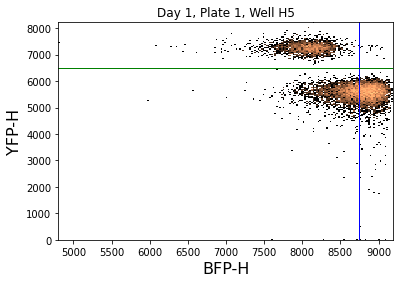

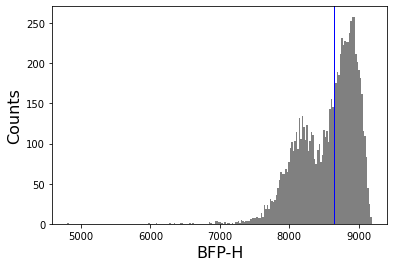

0.620288656715188


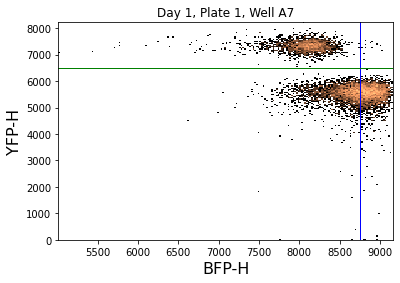

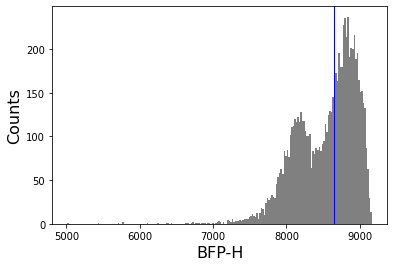

0.5961865651044049


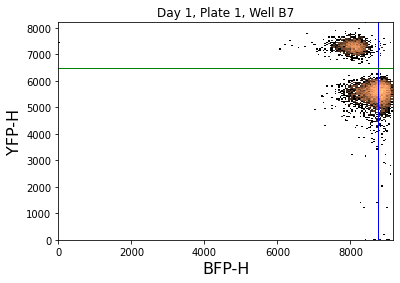

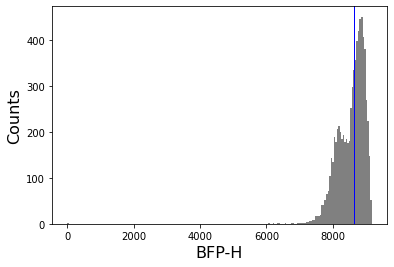

0.627104502158344


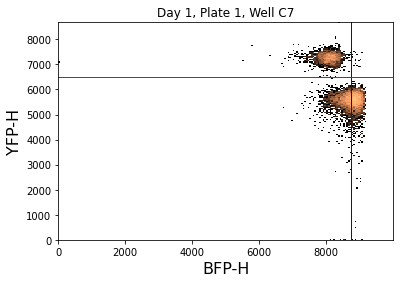

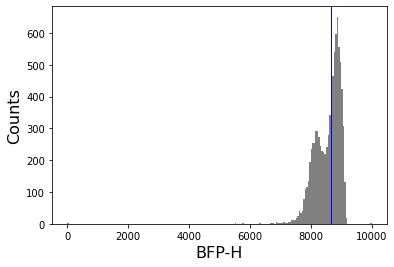

0.6197508492733943


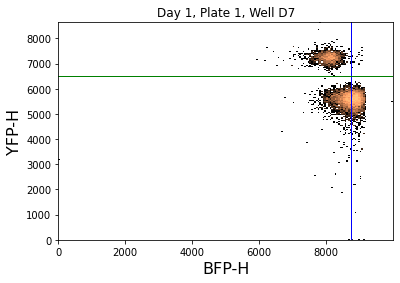

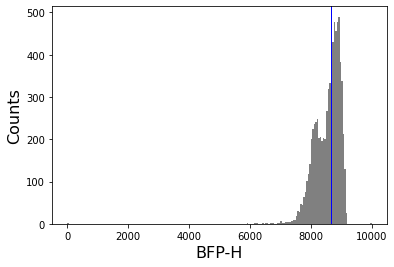

0.6162057364116609


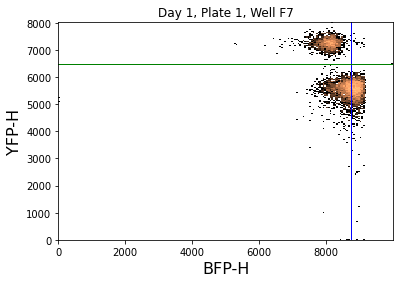

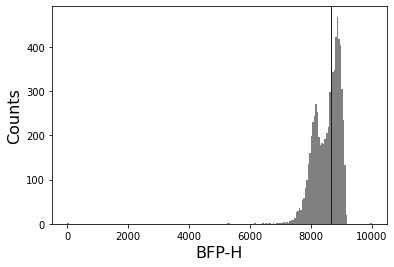

0.5911943610938077


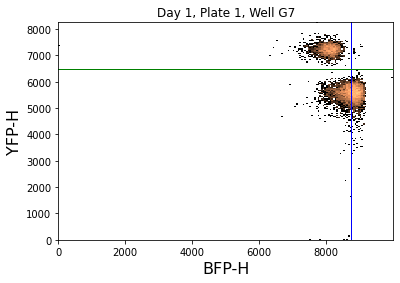

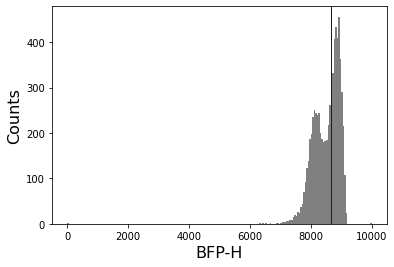

0.5655912285474562


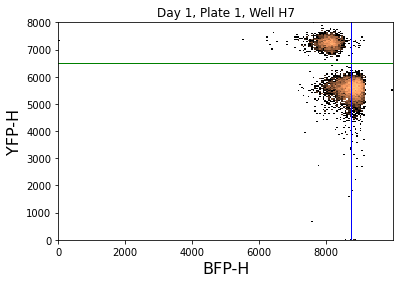

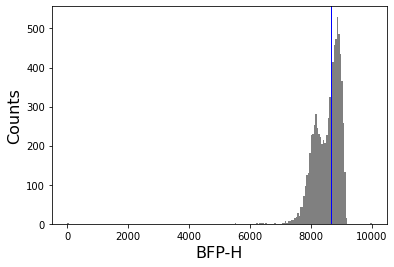

0.5995236279199004


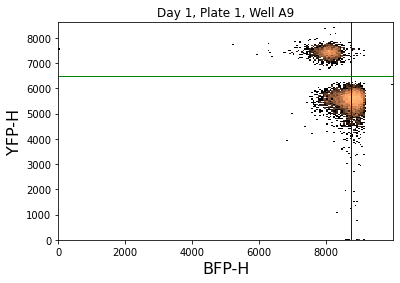

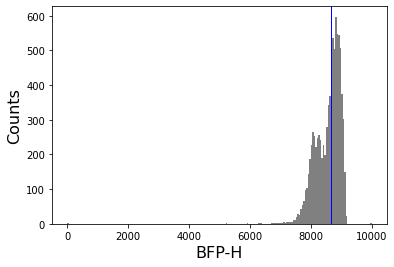

0.6464155843695963


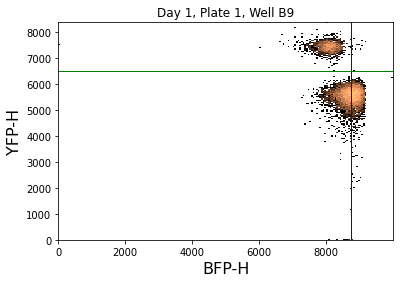

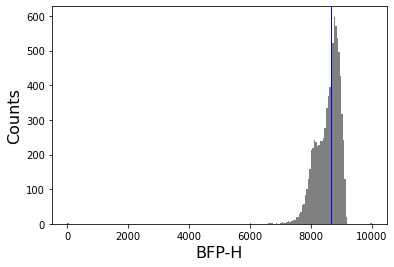

0.6451996157955638


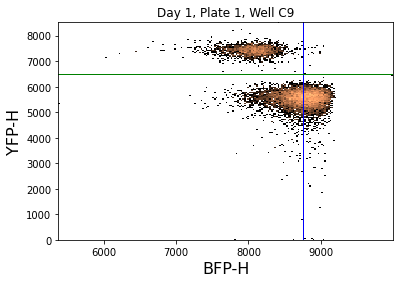

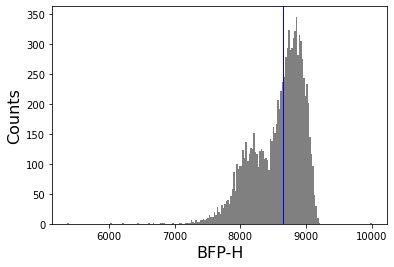

0.6476739250946055


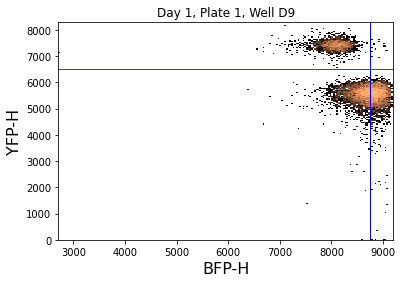

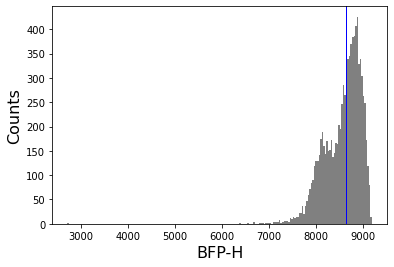

0.6637300319096129


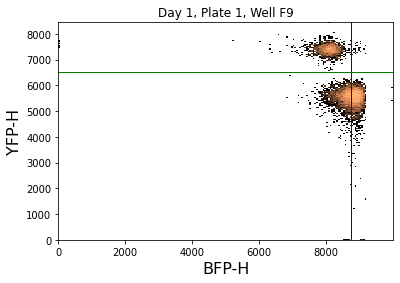

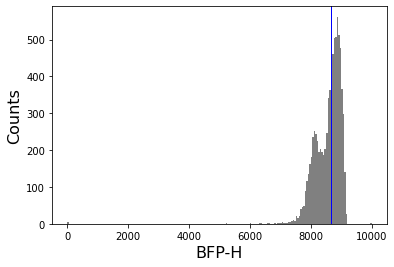

0.6363914831509798


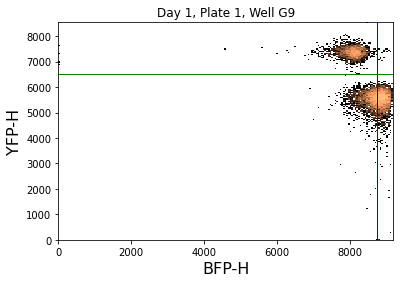

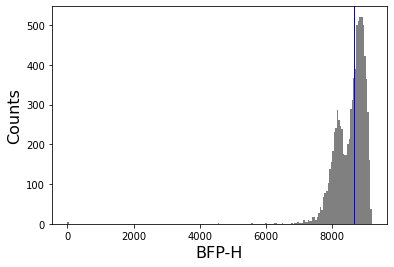

0.6055130255874783


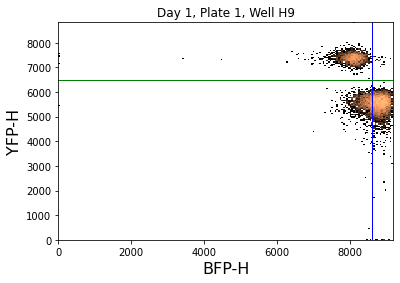

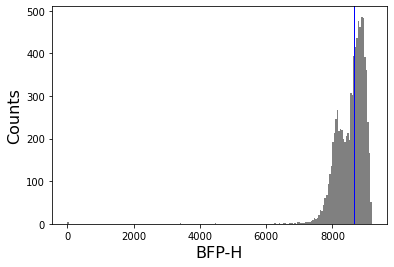

0.6895917154560038


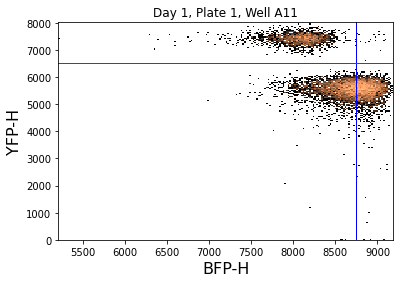

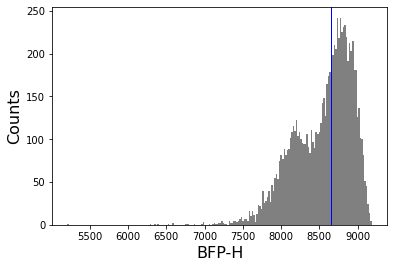

0.6222187523592405


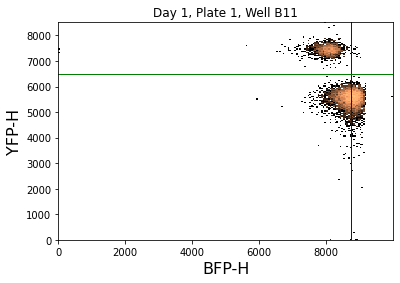

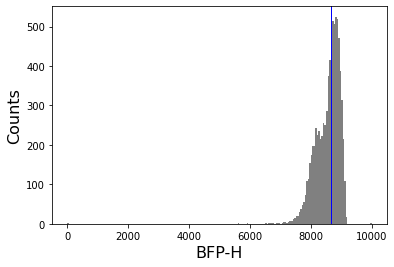

0.6420926521439051


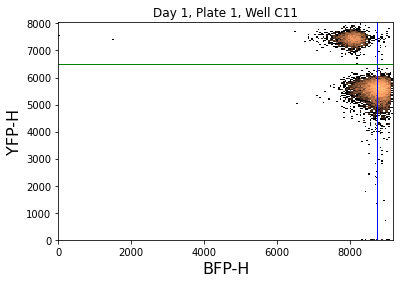

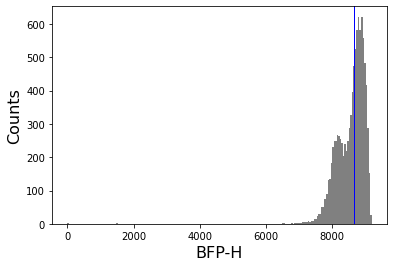

0.6390027636856901


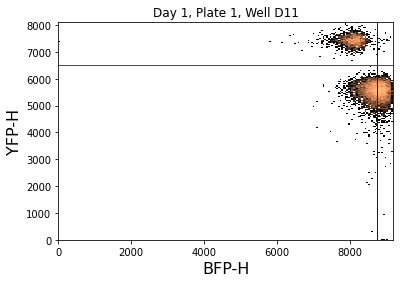

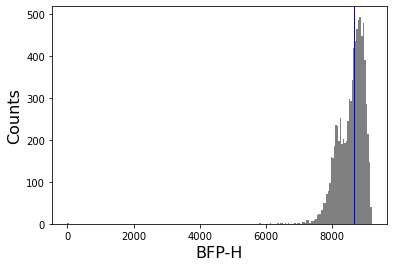

0.6354563931786311


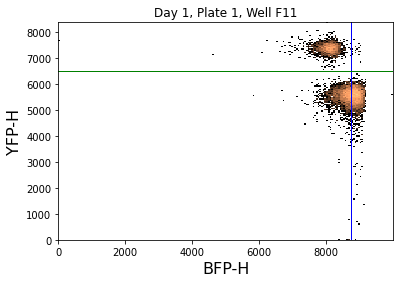

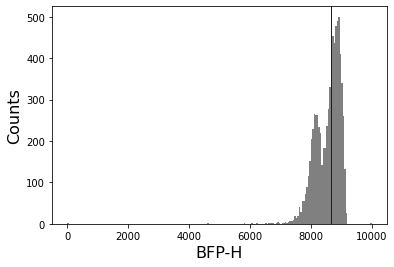

0.6121355840923358


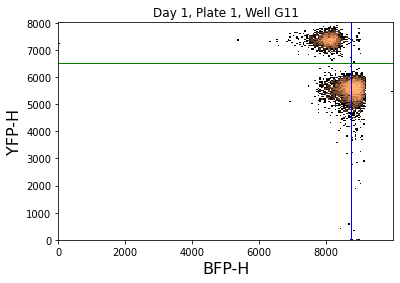

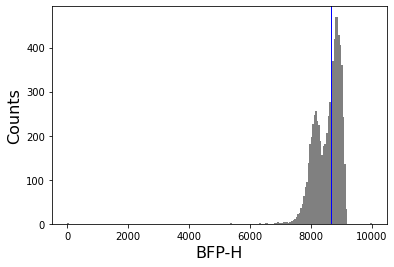

0.5894578516382415


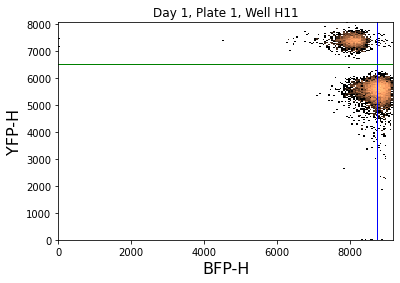

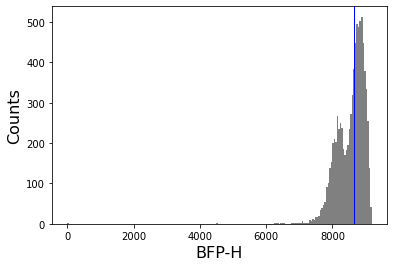

0.6056923304922938


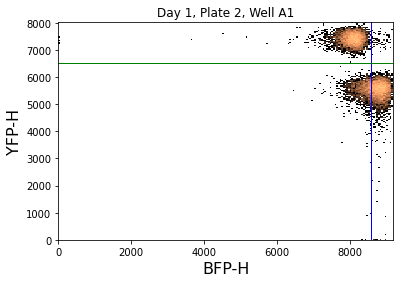

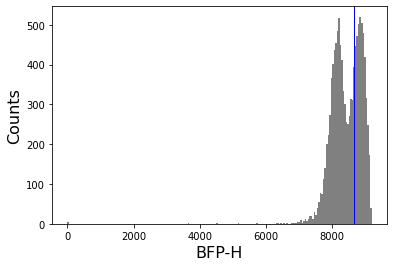

0.49895207282362286


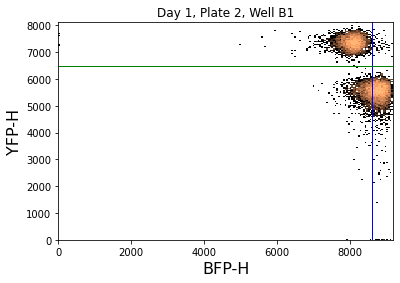

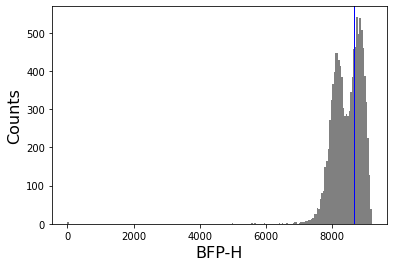

0.517735596229938


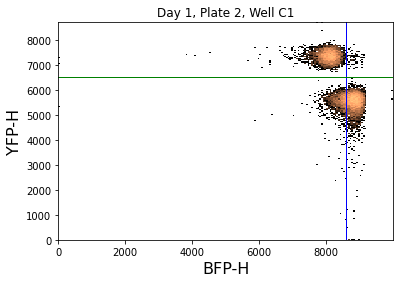

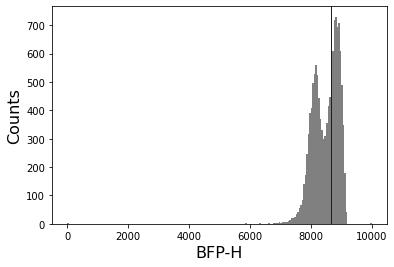

0.5562214979777036


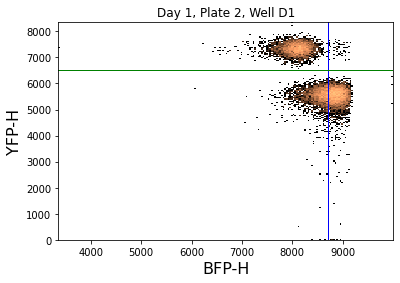

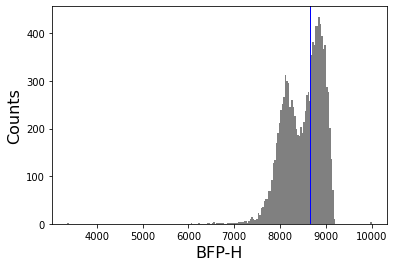

0.540291453949138


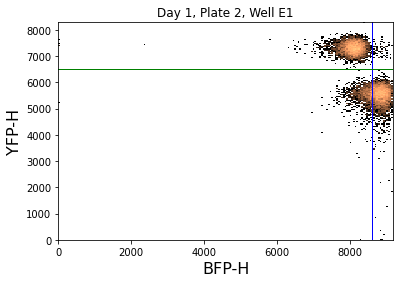

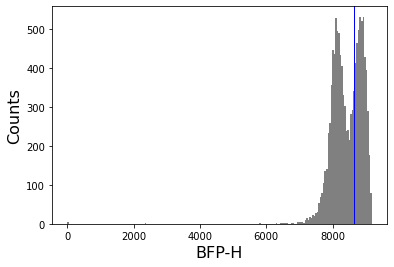

0.4844941867224505


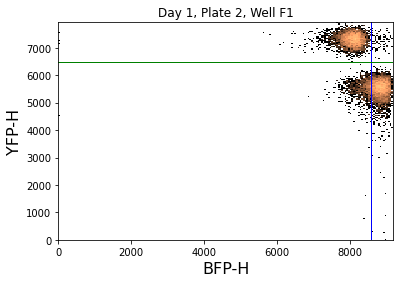

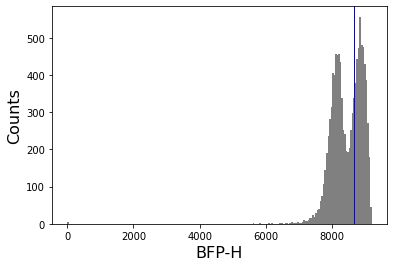

0.4994678889342888


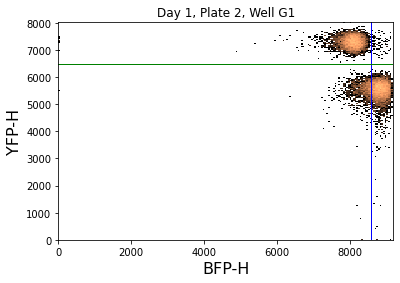

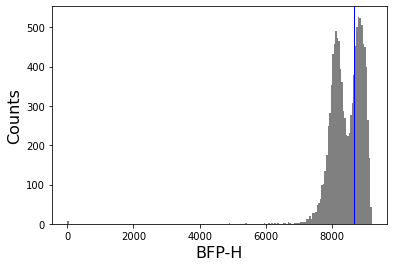

0.5050191909927054


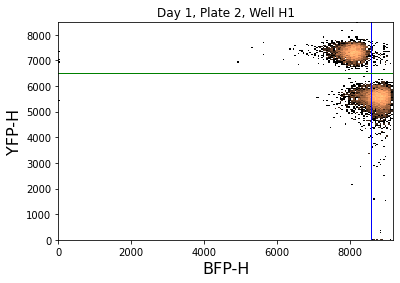

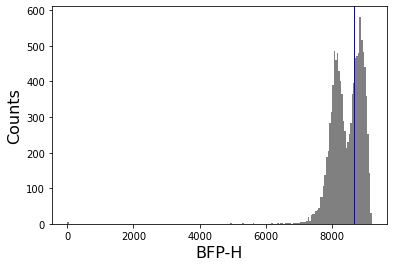

0.5118347728829084


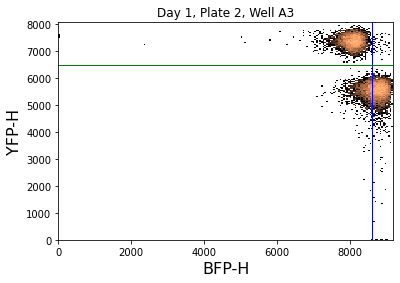

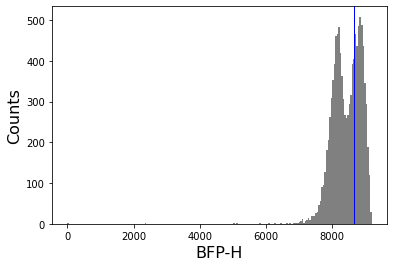

0.500165860179641


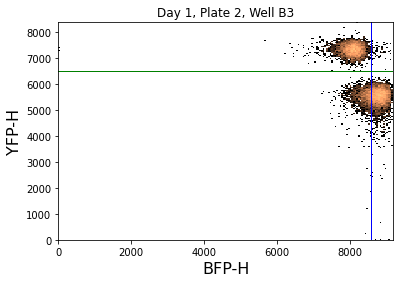

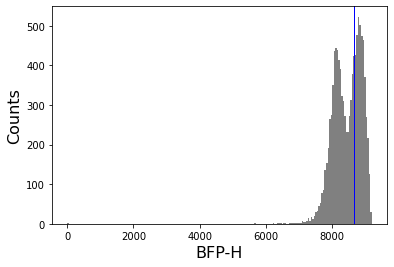

0.5226923540239824


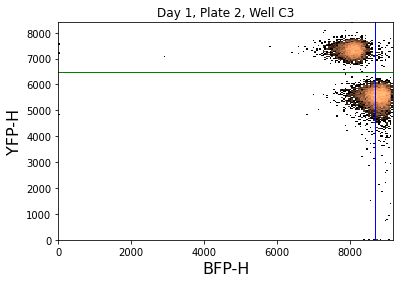

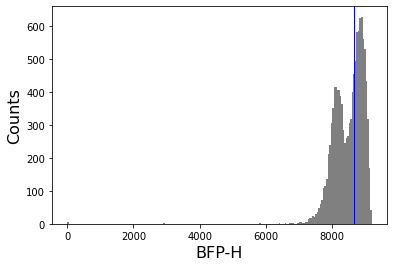

0.5349293495412143


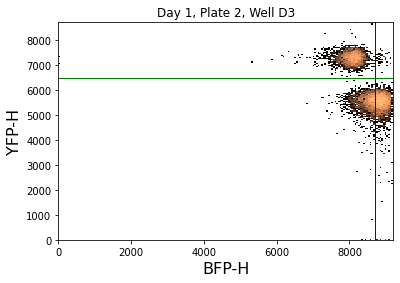

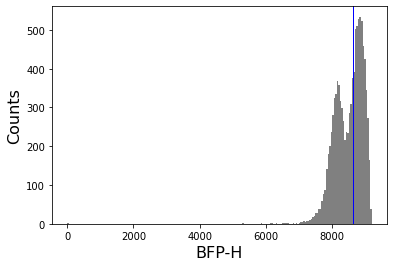

0.5599993569007987


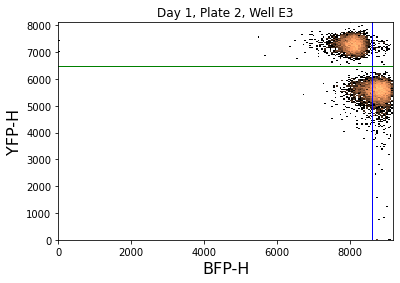

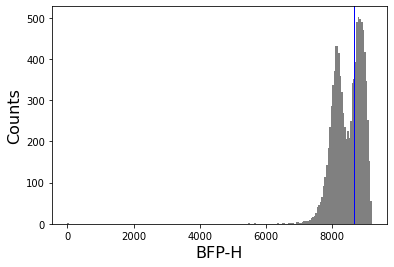

0.5322042264059104


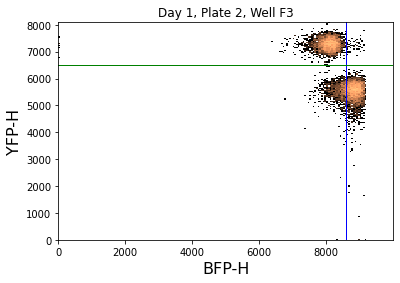

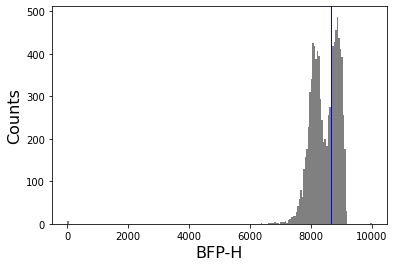

0.5087995980633975


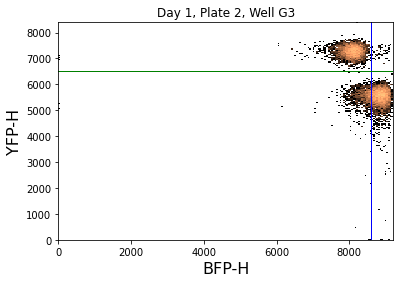

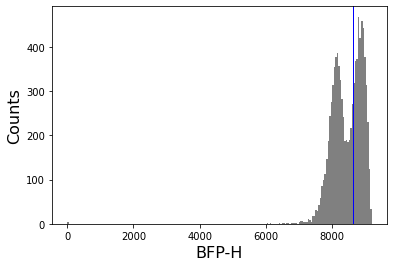

0.5252795561867815


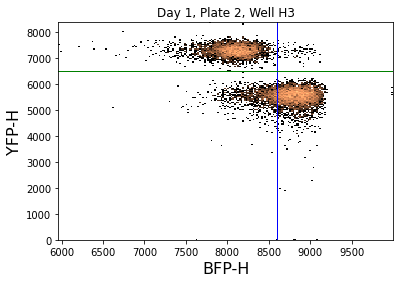

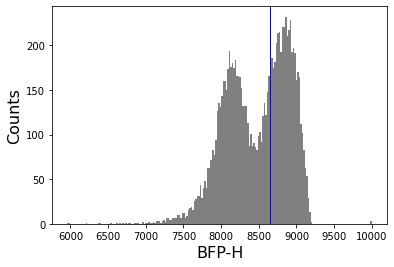

0.5425714925746752


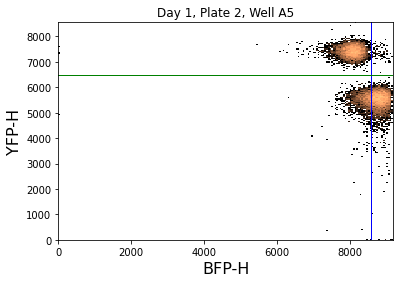

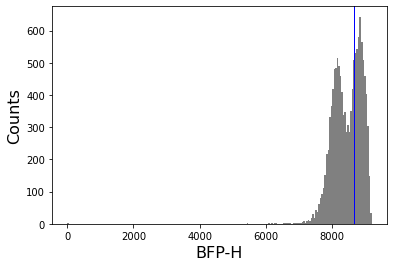

0.5242176825557754


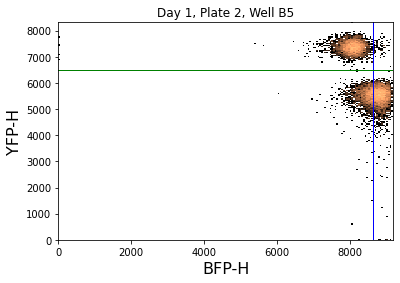

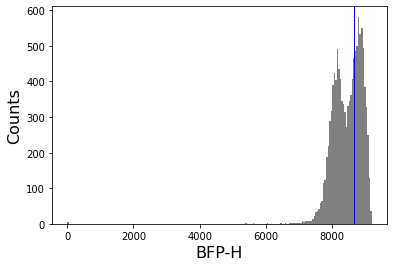

0.5085568021463486


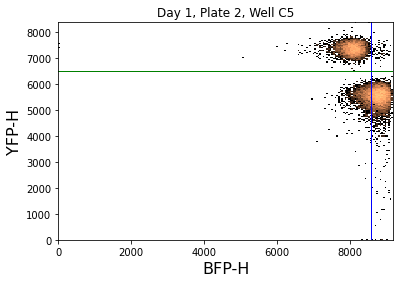

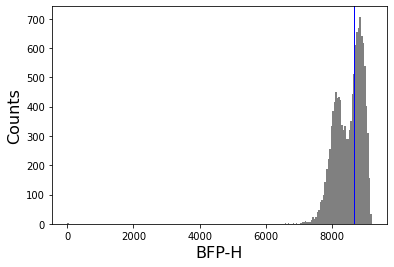

0.5813525811433085


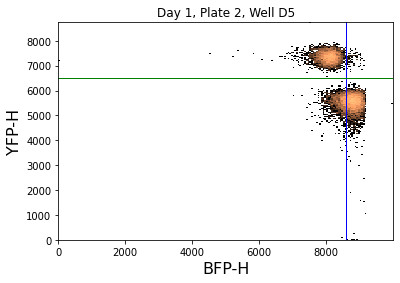

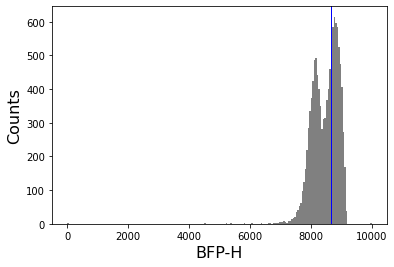

0.5478773703620055


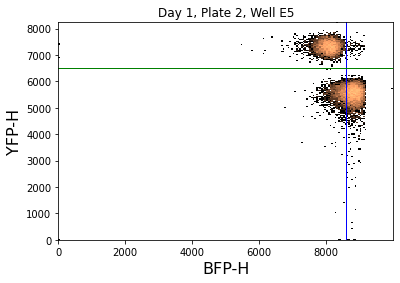

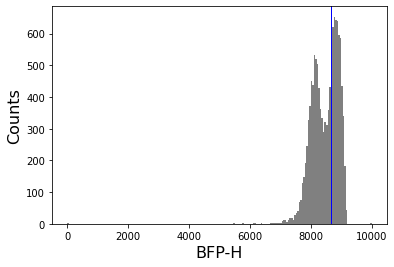

0.5417170113246801


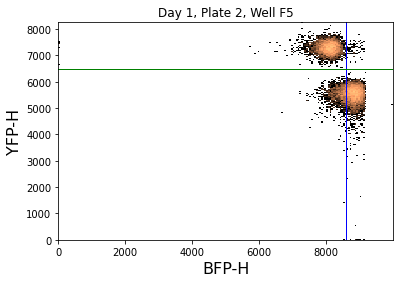

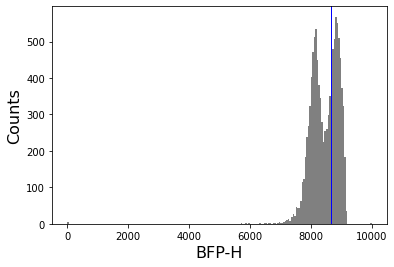

0.5106965188783646


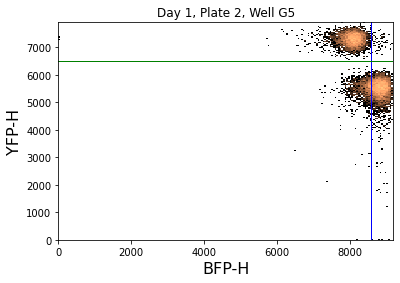

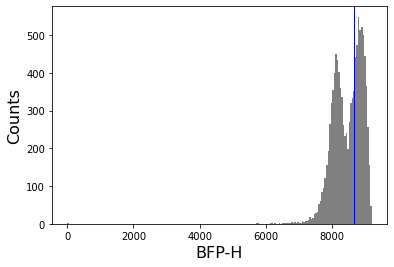

0.5317892385097697


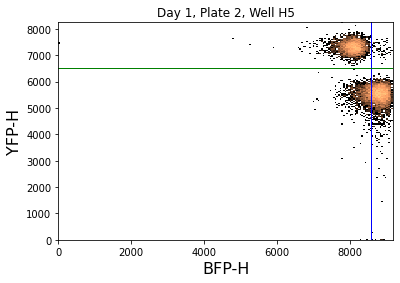

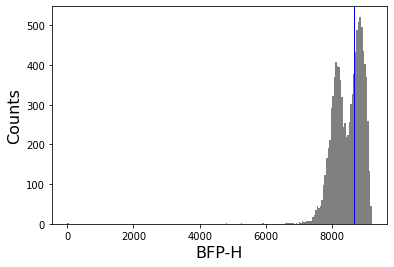

0.5440905760479486


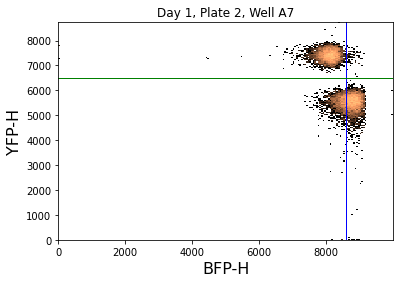

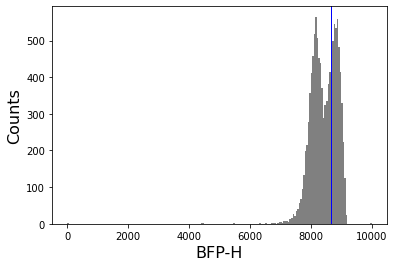

0.4939196667249543


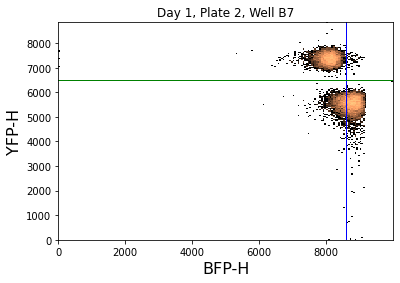

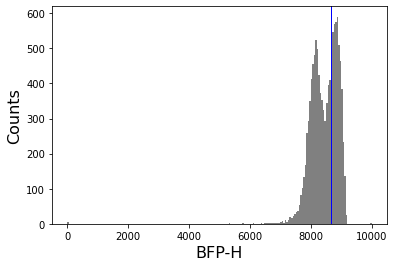

0.5152443629522521


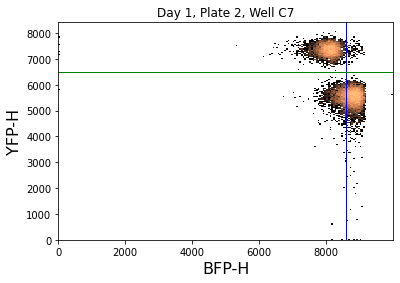

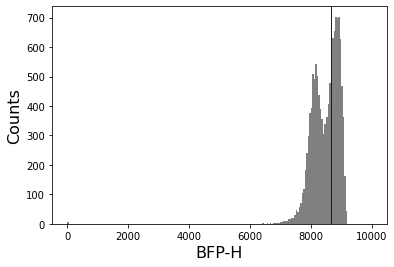

0.5550495453873463


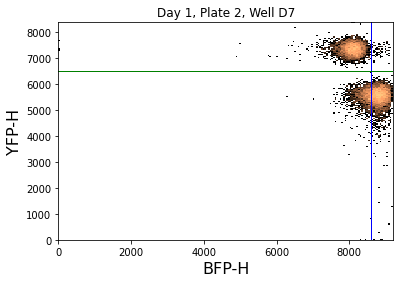

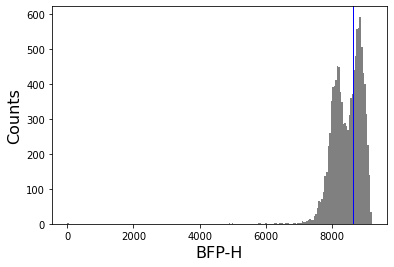

0.5381356588760857


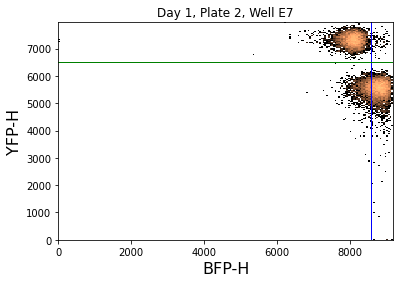

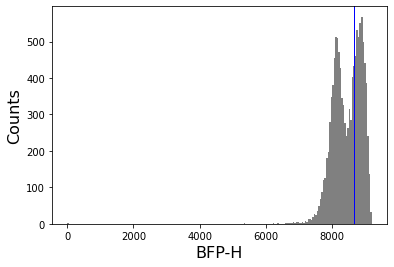

0.5169542241237742


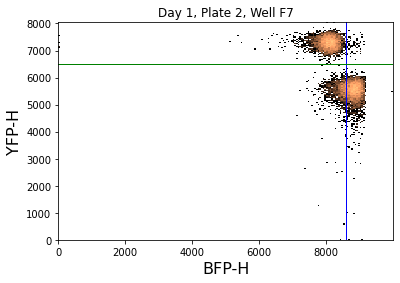

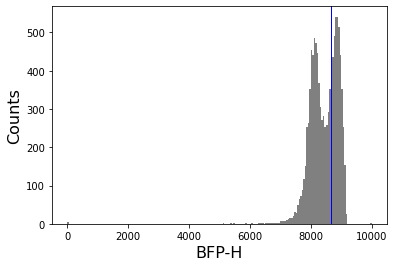

0.49323012917003173


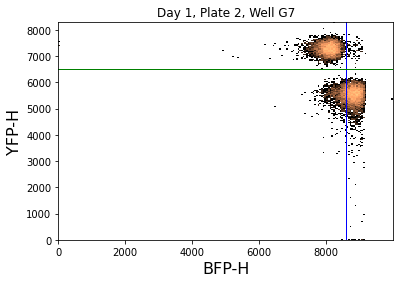

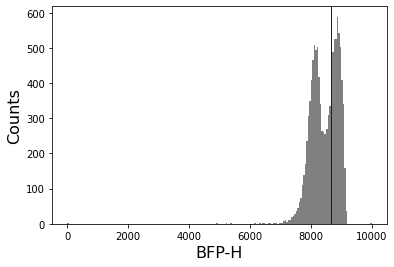

0.5061196005078279


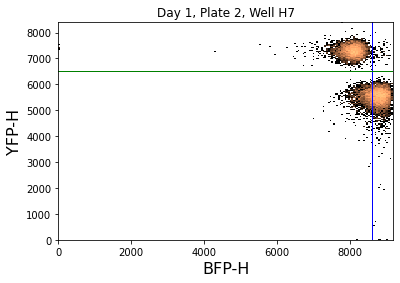

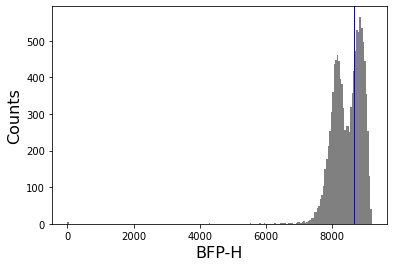

0.5236769978106649


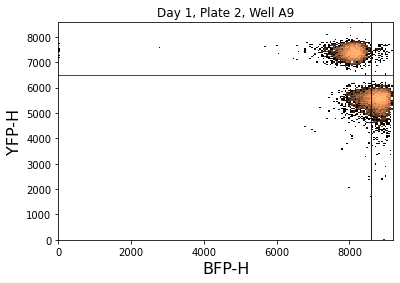

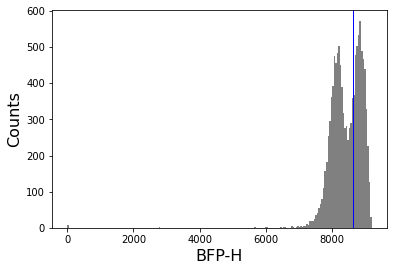

0.5019990557691884


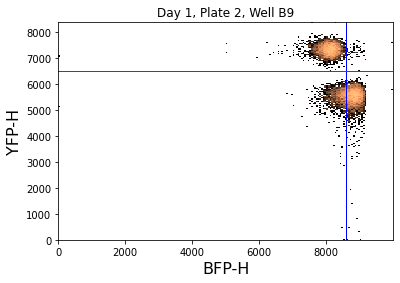

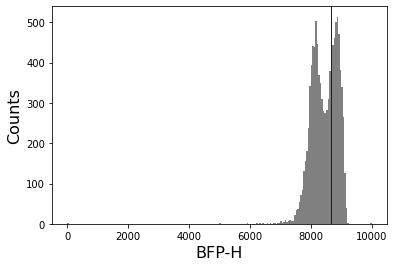

0.5070827310824091


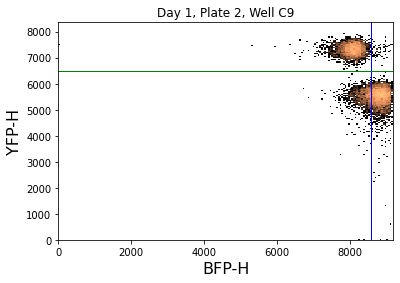

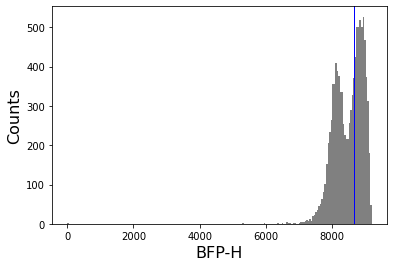

0.5636929948392709


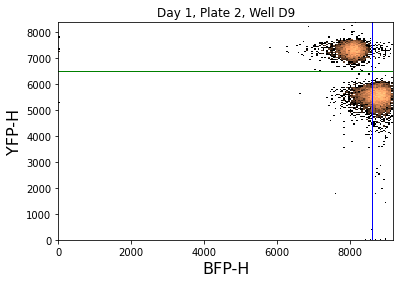

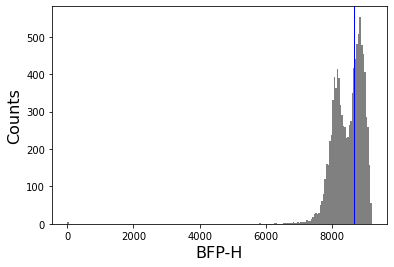

0.5539851486972547


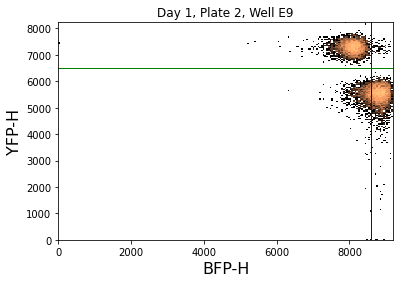

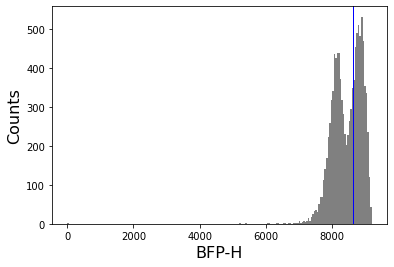

0.5140192964853519


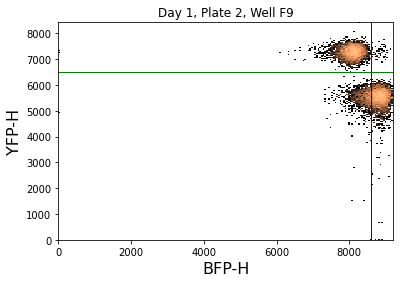

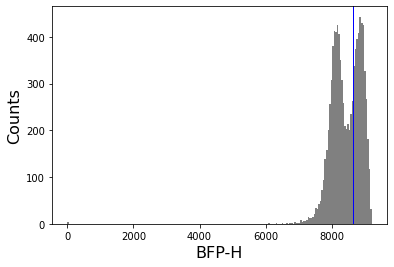

0.4893301885200722


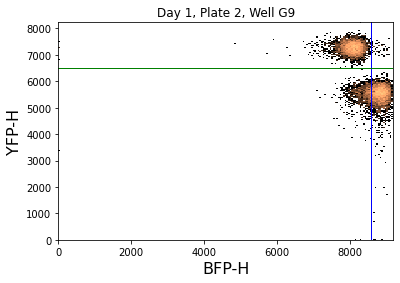

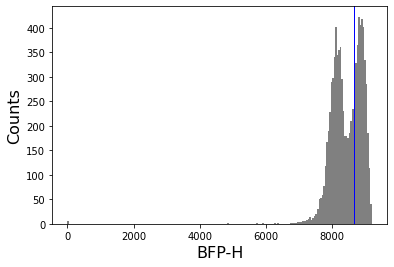

0.5011212540646983


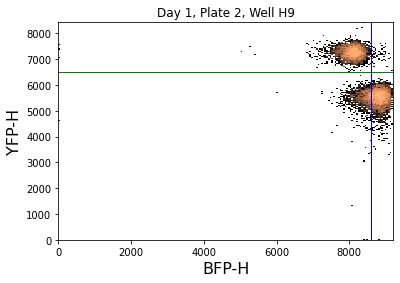

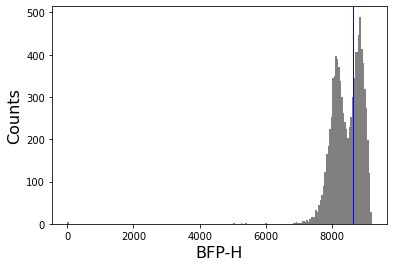

0.5149082990915023


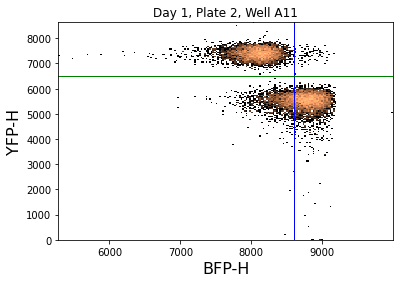

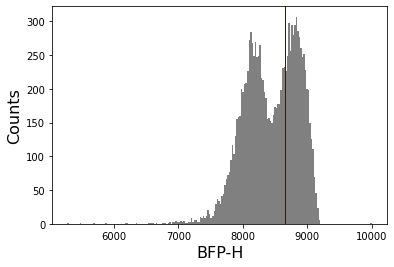

0.49667969434004805


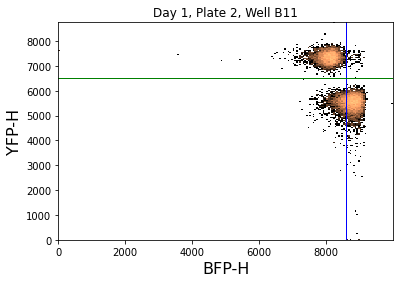

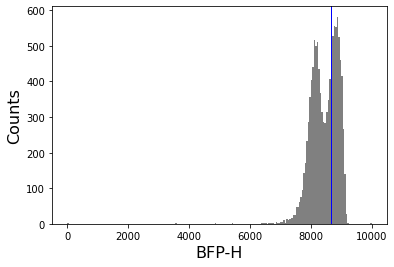

0.510780407282265


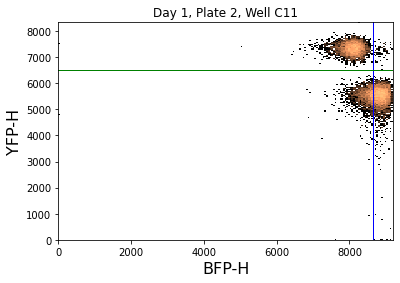

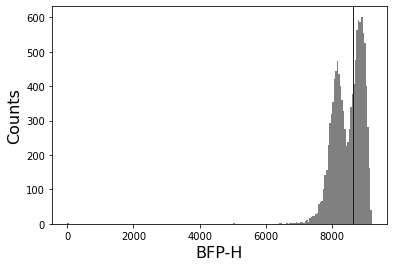

0.5314838307110337


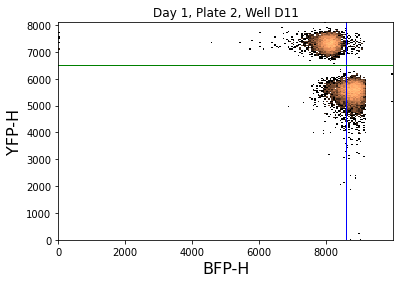

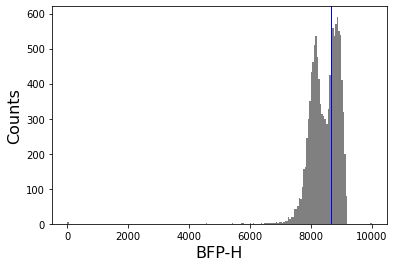

0.5241848470789666


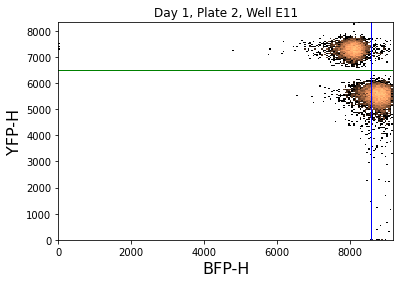

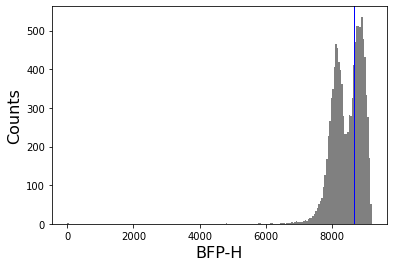

0.5218433085527181


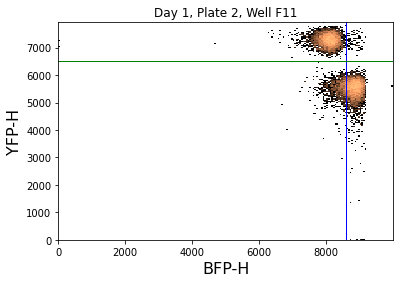

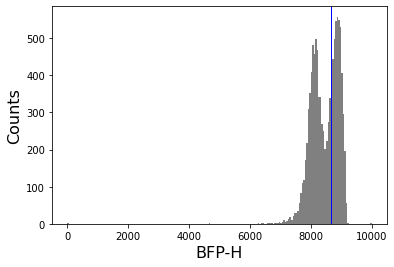

0.510740474886544


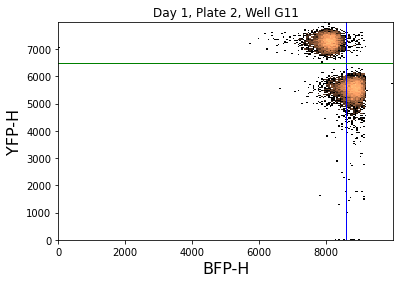

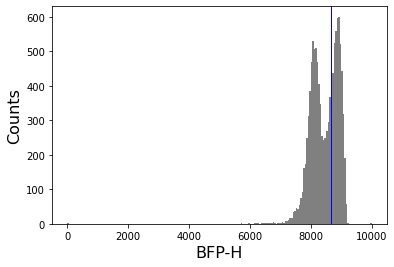

0.5026215988981524


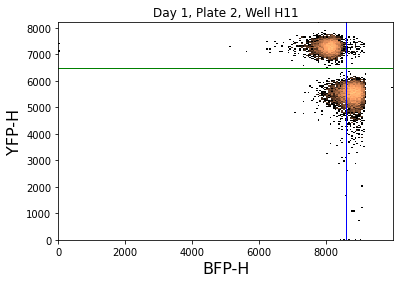

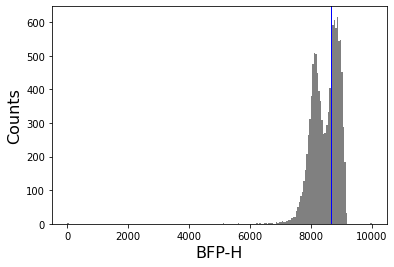

0.5382575060566454


In [188]:
wells = [[['A5','B5','A7','B7']], 
         [['A1','B1','C1','D1','F1','G1','H1','A3','B3','C3','D3','E3','F3','G3','H3','A5','B5','C5','D5','E5','F5','G5','H5','A7','B7','C7','D7','E7','F7','G7','H7'], 
         ['A1','B1','C1','D1','F1','G1','H1','A3','B3','C3','D3','F3','G3','H3','A5','B5','C5','D5','F5','G5','H5','A7','B7','C7','D7','F7','G7','H7','A9','B9','C9','D9','F9','G9','H9','A11','B11','C11','D11','F11','G11','H11'], 
         ['A1','B1','C1','D1','E1','F1','G1','H1','A3','B3','C3','D3','E3','F3','G3','H3','A5','B5','C5','D5','E5','F5','G5','H5','A7','B7','C7','D7','E7','F7','G7','H7','A9','B9','C9','D9','E9','F9','G9','H9','A11','B11','C11','D11','E11','F11','G11','H11']]]

bfp_threshold = [[{"A5":8700, "B5":8600, "A7":8650, "B7":8575}], 
                 [{"A1":8650, "B1":8600, "C1":8700, "D1":8750, "F1":8600, "G1":8600, "H1":8775,
                   "A3":8600, "B3":8600, "C3":8600, "D3":8600, "E3":8600, "F3":8600, "G3":8600, "H3":8600,
                   "A5":8600, "B5":8750, "C5":8600, "D5":8600, "E5":8600, "F5":8600, "G5":8600, "H5":8600,
                   "A7":8700, "B7":8700, "C7":8700, "D7":8700, "E7":8700, "F7":8800, "G7":8650, "H7":8700},
                  {"A1":8750, "B1":8750, "C1":8750, "D1":8750, "F1":8750, "G1":8750, "H1":8750,
                   "A3":8750, "B3":8750, "C3":8750, "D3":8750, "F3":8750, "G3":8750, "H3":8750,
                   "A5":8750, "B5":8750, "C5":8750, "D5":8750, "F5":8750, "G5":8750, "H5":8750,
                   "A7":8750, "B7":8750, "C7":8750, "D7":8750, "F7":8750, "G7":8750, "H7":8750,
                   "A9":8750, "B9":8750, "C9":8750, "D9":8750, "F9":8750, "G9":8750, "H9":8600,
                   "A11":8750, "B11":8750, "C11":8750, "D11":8750, "F11":8750, "G11":8750, "H11":8750}, 
                  {"A1":8600, "B1":8600, "C1":8600, "D1":8700, "E1":8600, "F1": 8600, "G1":8600, "H1":8600,
                   "A3":8600, "B3":8600, "C3":8700, "D3":8700, "E3":8600, "F3":8600, "G3":8600, "H3":8600,
                   "A5":8600, "B5":8650, "C5":8600, "D5":8600, "E5":8600, "F5":8600, "G5":8600, "H5":8600,
                   "A7":8600, "B7":8600, "C7":8600, "D7":8600, "E7":8600, "F7":8600, "G7":8600, "H7":8600,
                   "A9":8600, "B9":8600, "C9":8600, "D9":8625, "E9":8600, "F9":8600, "G9":8600, "H9":8600,
                   "A11":8600, "B11":8600, "C11":8650, "D11":8600, "E11":8600, "F11":8600, "G11":8600, "H11":8600}]]


for day in days:
    for plate in plates[day]:
        for well in wells[day][plates[day].index(plate)]:
            plt.figure()
            plot_plates(plates, day, plates[day].index(plate), well, bfp_threshold, yfp_threshold)
            plt.title('Day %d, Plate %d, Well %s' % (day, plates[day].index(plate), well))
            plt.show()
            
            plt.figure()
            all_plates[day][plates[day].index(plate)][well].plot(['BFP-H'], gates=[b_gate_upper]) 
            plt.show()

            res = get_bfp_freq_help(plate[well].data, day, plates[day].index(plate), well, bfp_threshold[day][plates[day].index(plate)][well], 6500)
            print(res[0])
            

In [3]:
b_data=[]

cols = [1,3,5,7,9,11]
rows = ['A','B','C','D','E','F','G','H']

for day in days:
    for row in rows:
        for col in cols:
            for plate in plates[day]:
                well = row + str(col)
                well_sort = str(col) + row
                try:
                    res,Q,bfp,yfp = get_bfp_freq(plate[well].data, day, plates[day].index(plate), well)
                except:
                    continue
                if day == 0 and plates[day].index(plate)+1 == 1: 
                    if col == 5:
                        if row == 'A':
                            group = "Daily_A"
                        if row == 'B':
                            group = "Daily_B"   
                    if col == 7:  
                        if row == 'A':
                            group = "PreM_A"
                        if row == 'B':
                            group = "PreM_B"
                if day == 1 and plates[day].index(plate)+1 == 1:
                    if col == 1:
                        group = "Dly_A"
                    if col == 3:
                        group = "Dly_B"
                    if col == 5:
                        group = "Pre_A"
                    if col == 7:
                        group = "Pre_B"
                if day == 1 and plates[day].index(plate)+1 == 2:
                    if row == 'A':
                        group = "Daily_A1"
                    if row == 'B':
                        group = "Daily_A2"
                    if row == 'C':
                        group = "Daily_A3"
                    if row == 'D':
                        group = "Daily_A4"
                    if row == 'E':
                        group = "Daily_A5"
                    if row == 'F':
                        group = "Daily_A6"
                    if row == 'G':
                        group = "Daily_A7"  
                    if row == 'H':
                        group = "Daily_A8" 
                if day == 1 and plates[day].index(plate)+1 == 3:
                    if row == 'A':
                        group = "Daily_B1"
                    if row == 'B':
                        group = "Daily_B2"
                    if row == 'C':
                        group = "Daily_B3"
                    if row == 'D':
                        group = "Daily_B4"
                    if row == 'E':
                        group = "Daily_B5"
                    if row == 'F':
                        group = "Daily_B6"
                    if row == 'G':
                        group = "Daily_B7"  
                    if row == 'H':
                        group = "Daily_B8" 
                b_data.append({
                    'day':day,
                    'plate':plates[day].index(plate)+1,
                    'well':well,
                    'sort by well': well_sort,
                    'group': group,
                    'S freq': res[0],
                    'lambda': res[1],
                    'total count':Q,
                    'corrected total count': Q*res[1]/(1-np.exp(-res[1])),
                    'BFP':bfp,
                    'YFP':yfp,
                })     
            
df = pd.DataFrame(b_data)
df['f_trafo'] = np.arcsin(2*df['S freq'] - 1) #perform variance stabilizing transform
df.sort_values(['day','plate','sort by well'])

/var/folders/wb/w4d_wff91hz5pg5nwj41180h0000gn/T/ipykernel_26951/327814859.py:25: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bfp_mean = np.float(data[bfp_pos & yfp_neg]['BFP-H'].mean())
/var/folders/wb/w4d_wff91hz5pg5nwj41180h0000gn/T/ipykernel_26951/327814859.py:26: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  yfp_mean = np.float(dat

,day,plate,well,sort by well,group,S freq,lambda,total count,corrected total count,BFP,YFP,f_trafo
0,0,1,A5,5A,Daily_A,0.684930,0.013213,4910,4942.508834,8867.743819,7374.875699,0.378858
2,0,1,B5,5B,Daily_B,0.508377,0.024786,7103,7191.389458,8808.864485,7314.405950,0.016755
1,0,1,A7,7A,PreM_A,0.553489,0.012547,3870,3894.328686,8873.300747,7128.607869,0.107183
3,0,1,B7,7B,PreM_B,0.501247,0.027432,6416,6504.404267,8777.521546,7309.946156,0.002494
4,1,1,A1,1A,Dly_A,0.684497,0.018443,7030,7095.026256,8841.680245,7338.193479,0.377927
...,...,...,...,...,...,...,...,...,...,...,...,...
65,1,3,D9,9D,Daily_B4,0.553985,0.033015,8336,8474.364394,8864.109676,7304.981427,0.108181
75,1,3,E9,9E,Daily_B5,0.514019,0.032193,9202,9350.914359,8855.446900,7283.611291,0.028042
90,1,3,F9,9F,Daily_B6,0.489330,0.029279,8201,8321.642654,8860.113701,7265.545672,-0.021341
106,1,3,G9,9G,Daily_B7,0.501121,0.025327,7581,7677.407000,8861.618703,7263.231375,0.002243


In [4]:
#Day 0, plate 1
df_d0 = df.loc[(df['day']==0)]
df_d0.sort_values(['plate','sort by well'])

,day,plate,well,sort by well,group,S freq,lambda,total count,corrected total count,BFP,YFP,f_trafo
0,0,1,A5,5A,Daily_A,0.684930,0.013213,4910,4942.508834,8867.743819,7374.875699,0.378858
2,0,1,B5,5B,Daily_B,0.508377,0.024786,7103,7191.389458,8808.864485,7314.405950,0.016755
1,0,1,A7,7A,PreM_A,0.553489,0.012547,3870,3894.328686,8873.300747,7128.607869,0.107183
3,0,1,B7,7B,PreM_B,0.501247,0.027432,6416,6504.404267,8777.521546,7309.946156,0.002494


In [7]:
#Day 1, plate 1
df_d1 = df[(df['day']==1) & (df['plate']==1)]
df_d1.sort_values(['plate','sort by well'])
df_d1.head(50)

,day,plate,well,sort by well,group,S freq,lambda,total count,corrected total count,BFP,YFP,f_trafo
4,1,1,A1,1A,Dly_A,0.684497,0.018443,7030,7095.026256,8841.680245,7338.193479,0.377927
7,1,1,A3,3A,Dly_B,0.477003,0.027920,9045,9171.856724,8804.605178,7304.274340,-0.046010
10,1,1,A5,5A,Pre_A,0.444124,0.023261,6443,6518.227185,8914.987972,7227.319585,-0.111986
13,1,1,A7,7A,Pre_B,0.566061,0.009982,6933,6967.661701,8837.590635,7400.654190,0.132510
20,1,1,B1,1B,Dly_A,0.659406,0.019086,5599,5652.601060,8795.453393,7290.772359,0.324475
23,1,1,B3,3B,Dly_B,0.473670,0.033248,8204,8341.137023,8797.452382,7297.936711,-0.052684
26,1,1,B5,5B,Pre_A,0.611326,0.015654,7797,7858.184765,8920.355902,7260.799806,0.224534
29,1,1,B7,7B,Pre_B,0.558383,0.012265,7605,7651.731319,8843.363706,7436.821631,0.117033
36,1,1,C1,1C,Dly_A,0.668035,0.008542,6335,6362.094321,8843.870911,7275.435580,0.342741
39,1,1,C3,3C,Dly_B,0.537919,0.031349,9112,9255.570524,8803.617189,7292.278981,0.075910


In [8]:
df_vard1 = df_d1.groupby(['group']).var().reset_index().rename(columns = {'f_trafo':'var(f_trafo)'}) #calculate variance
df_vard1.head(50)

,group,day,plate,S freq,lambda,total count,corrected total count,BFP,YFP,var(f_trafo)
0,Dly_A,0.0,0.0,0.003019,0.000033,1.043348e+06,1.069780e+06,1031.557722,788.477945,0.012783
1,Dly_B,0.0,0.0,0.000554,0.000013,3.046786e+05,3.222044e+05,15.827787,292.893912,0.002222
2,Pre_A,0.0,0.0,0.003544,0.000019,1.060437e+06,1.077622e+06,106.564628,112.575428,0.014355
3,Pre_B,0.0,0.0,0.001124,0.000025,6.584001e+05,6.980476e+05,429.850641,158.150937,0.004559


In [9]:
title_dict = {"Dly_A":"S BFP:L YFP 50:50, daily mix",
              "Dly_B":"S BFP:Sl1 YFP 50:50, daily mix",
              "Pre_A":"S BFP:L YFP 50:50, premixed",
              "Pre_B":"S BFP:Sl1 YFP 50:50, premixed"}
df_vard1['group'] = df_vard1['group'].replace(title_dict)
df_vard1.head(50)

,group,day,plate,S freq,lambda,total count,corrected total count,BFP,YFP,var(f_trafo)
0,"S BFP:L YFP 50:50, daily mix",0.0,0.0,0.003019,0.000033,1.043348e+06,1.069780e+06,1031.557722,788.477945,0.012783
1,"S BFP:Sl1 YFP 50:50, daily mix",0.0,0.0,0.000554,0.000013,3.046786e+05,3.222044e+05,15.827787,292.893912,0.002222
2,"S BFP:L YFP 50:50, premixed",0.0,0.0,0.003544,0.000019,1.060437e+06,1.077622e+06,106.564628,112.575428,0.014355
3,"S BFP:Sl1 YFP 50:50, premixed",0.0,0.0,0.001124,0.000025,6.584001e+05,6.980476e+05,429.850641,158.150937,0.004559


In [10]:
df_nA = df[(df['day']==1) & (df['plate']==2)]
df_nA.sort_values(['plate','sort by well'])
df_varnA = df_nA.groupby(['group']).var().reset_index().rename(columns = {'f_trafo':'var(f_trafo)'}) #calculate variance
df_varnA.head(50)

,group,day,plate,S freq,lambda,total count,corrected total count,BFP,YFP,var(f_trafo)
0,Daily_A1,0.0,0.0,0.000741,0.000019,280275.066667,295316.712384,573.649940,2055.961367,0.003218
1,Daily_A2,0.0,0.0,0.000388,0.000001,220768.566667,224998.879891,590.990618,6098.971249,0.001644
2,Daily_A3,0.0,0.0,0.000202,0.000004,140032.700000,142915.619700,430.045314,4896.073435,0.000866
3,Daily_A4,0.0,0.0,0.000277,0.000004,154587.066667,156345.359087,146.744467,6516.834154,0.001205
4,Daily_A6,0.0,0.0,0.000354,0.000015,50001.466667,52904.865925,74.300300,4178.528975,0.001488
5,Daily_A7,0.0,0.0,0.000171,0.000006,152378.566667,154522.542766,29.064546,4504.949495,0.000704
6,Daily_A8,0.0,0.0,0.001125,0.000009,348768.300000,356242.232218,707.817431,3839.828291,0.004946


In [11]:
df_nB = df[(df['day']==1) & (df['plate']==3)]
df_nB.sort_values(['plate','sort by well'])
df_varnB = df_nB.groupby(['group']).var().reset_index().rename(columns = {'f_trafo':'var(f_trafo)'}) #calculate variance
df_varnB.head(50)

,group,day,plate,S freq,lambda,total count,corrected total count,BFP,YFP,var(f_trafo)
0,Daily_B1,0.0,0.0,0.000119,0.000021,379718.266667,4.078022e+05,54.039858,252.564504,0.000478
1,Daily_B2,0.0,0.0,0.000036,0.000025,196997.866667,2.086128e+05,93.819062,381.655662,0.000143
2,Daily_B3,0.0,0.0,0.000344,0.000020,838052.800000,8.830873e+05,364.046538,289.792556,0.001393
3,Daily_B4,0.0,0.0,0.000162,0.000025,795112.300000,8.394791e+05,515.898091,316.165658,0.000654
4,Daily_B5,0.0,0.0,0.000383,0.000008,344742.966667,3.634704e+05,6.175778,225.299097,0.001536
5,Daily_B6,0.0,0.0,0.000088,0.000005,354288.700000,3.771330e+05,21.602804,176.311393,0.000354
6,Daily_B7,0.0,0.0,0.000172,0.000017,964814.266667,1.015043e+06,7.511559,205.578966,0.000687
7,Daily_B8,0.0,0.0,0.000204,0.000008,485225.366667,5.016521e+05,3.963241,359.205680,0.000818


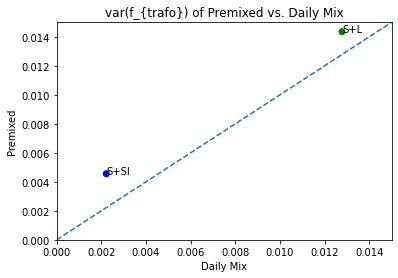

In [22]:
labels = ["S+L", "S+Sl"]  
colors = ["green", "blue"]

premix_var = df_vard1['var(f_trafo)'][2:]
daily_var = df_vard1['var(f_trafo)'][:2]
plt.scatter(daily_var, premix_var,c=colors)

plt.title("var(f_{trafo}) of Premixed vs. Daily Mix")
plt.xlabel("Daily Mix")
plt.ylabel("Premixed")
plt.xlim(0, 0.015) 
plt.ylim(0, 0.015) 
for daily, pre, label in zip(daily_var, premix_var, labels):
    plt.text(daily, pre, label)
plt.plot([0,0.016],[0,0.016],'--')
plt.show()

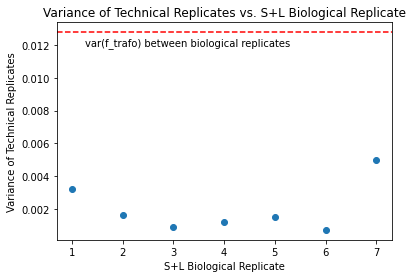

In [19]:
#noise for S+L
bio_rep = list(range(1,8))
noise_var = df_varnA['var(f_trafo)']
daily_var = df_vard1['var(f_trafo)'][0]
plt.scatter(bio_rep, noise_var)

plt.title("Variance of Technical Replicates vs. S+L Biological Replicate")
plt.xlabel("S+L Biological Replicate")
plt.ylabel("Variance of Technical Replicates")
plt.axhline(y=daily_var, color='r', linestyle='--')
plt.xticks(ticks=bio_rep) 
plt.text(1.25, 0.012, 'var(f_trafo) between biological replicates')
plt.show()


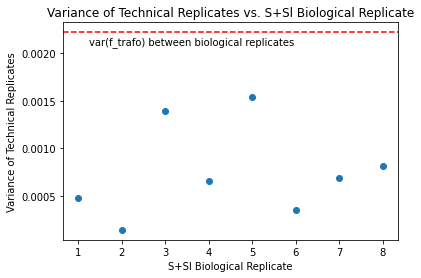

In [23]:
#noise for S+Sl
bio_rep = list(range(1,9))
noise_var = df_varnB['var(f_trafo)']
daily_var = df_vard1['var(f_trafo)'][1]
plt.scatter(bio_rep, noise_var)

plt.title("Variance of Technical Replicates vs. S+Sl Biological Replicate")
plt.xlabel("S+Sl Biological Replicate")
plt.ylabel("Variance of Technical Replicates")
plt.axhline(y=daily_var, color='r', linestyle='--')
plt.text(1.25, 0.0021, 'var(f_trafo) between biological replicates')
plt.xticks(ticks=bio_rep) 
plt.show()

In [24]:
def CI(alpha, df_var):
    n = 6
    a = sp.stats.chi2.isf(1-alpha/2, n-1)
    b = sp.stats.chi2.isf(alpha/2, n-1)
    df_var['u'] = ((n-1)*df_var['var(f_trafo)'])/a - df_var['var(f_trafo)']
    df_var['l'] = df_var['var(f_trafo)'] - ((n-1)*df_var['var(f_trafo)'])/b

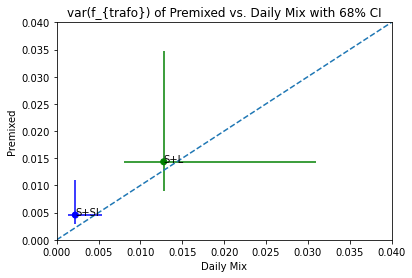

In [29]:
CI(0.32, df_vard1)
labels = ["S+L", "S+Sl"]  
colors = ["green", "blue"]

premix_var = df_vard1['var(f_trafo)'][2:]
daily_var = df_vard1['var(f_trafo)'][:2]
plt.scatter(daily_var, premix_var, c=colors)
plt.errorbar(daily_var, premix_var, 
             xerr = (df_vard1['l'][:2].to_list(),df_vard1['u'][:2].to_list()), #fmt='o')  
             yerr = (df_vard1['l'][2:].to_list(),df_vard1['u'][2:].to_list()), fmt='none', ecolor=colors)

plt.title("var(f_{trafo}) of Premixed vs. Daily Mix with 68% CI")
plt.xlabel("Daily Mix")
plt.ylabel("Premixed")
plt.xlim(0, 0.04)
plt.ylim(0, 0.04) 
for daily, pre, label in zip(daily_var, premix_var, labels):
    plt.text(daily, pre, label)

plt.plot([0,0.04],[0,0.04],'--')
plt.show()

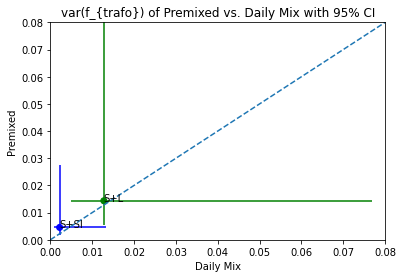

,group,day,plate,S freq,lambda,total count,corrected total count,BFP,YFP,var(f_trafo),u,l
0,"S BFP:L YFP 50:50, daily mix",0.0,0.0,0.003019,0.000033,1.043348e+06,1.069780e+06,1031.557722,788.477945,0.012783,0.064111,0.007802
1,"S BFP:Sl1 YFP 50:50, daily mix",0.0,0.0,0.000554,0.000013,3.046786e+05,3.222044e+05,15.827787,292.893912,0.002222,0.011142,0.001356
2,"S BFP:L YFP 50:50, premixed",0.0,0.0,0.003544,0.000019,1.060437e+06,1.077622e+06,106.564628,112.575428,0.014355,0.071997,0.008762
3,"S BFP:Sl1 YFP 50:50, premixed",0.0,0.0,0.001124,0.000025,6.584001e+05,6.980476e+05,429.850641,158.150937,0.004559,0.022864,0.002783


In [31]:
CI(0.05, df_vard1)
labels = ["S+L", "S+Sl"]  
colors = ["green", "blue"]

premix_var = df_vard1['var(f_trafo)'][2:]
daily_var = df_vard1['var(f_trafo)'][:2]
plt.scatter(daily_var, premix_var, c=colors)
plt.errorbar(daily_var, premix_var, 
             xerr = (df_vard1['l'][:2].to_list(),df_vard1['u'][:2].to_list()), #fmt='o')  
             yerr = (df_vard1['l'][2:].to_list(),df_vard1['u'][2:].to_list()), fmt='none', ecolor=colors)

plt.title("var(f_{trafo}) of Premixed vs. Daily Mix with 95% CI")
plt.xlabel("Daily Mix")
plt.ylabel("Premixed")
plt.xlim(0, 0.08)
plt.ylim(0, 0.08)
for daily, pre, label in zip(daily_var, premix_var, labels):
    plt.text(daily, pre, label)
plt.plot([0,0.1],[0,0.1],'--')
plt.show()

df_vard1.head(50)